In [ ]:
!pip install scikit-learn tensorflow tensorflow-addons keras pandas numpy matplotlib seaborn xgboost imbalanced-learn layers models callbacks

  Using cached tensorflow_addons-0.23.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached layers-0.1.5.tar.gz (5.5 kB)
  Preparing metadata (setup.py) ... done
  Using cached models-0.9.3.tar.gz (16 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
#Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

#Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#Deep Learning ML Models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.layers import ActivityRegularization

#Sampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

In [ ]:
#For EDA and Model Training Visualization

sns.set(style='whitegrid')

In [ ]:
#Step 2: Loading  the cleaned datasets

df_mon = pd.read_parquet('/content/parquet/Benign-Monday-no-metadata.parquet')
df_tues = pd.read_parquet('/content/parquet/Bruteforce-Tuesday-no-metadata.parquet')
df_wed = pd.read_parquet('/content/parquet/DoS-Wednesday-no-metadata.parquet')
df_thursI = pd.read_parquet('/content/parquet/Infiltration-Thursday-no-metadata.parquet')
df_thursW = pd.read_parquet('/content/parquet/WebAttacks-Thursday-no-metadata.parquet')
df_friP = pd.read_parquet('/content/parquet/Portscan-Friday-no-metadata.parquet')
df_friB = pd.read_parquet('/content/parquet/Botnet-Friday-no-metadata.parquet')
df_friD = pd.read_parquet('/content/parquet/DDoS-Friday-no-metadata.parquet')

df_combined = pd.concat([
                          df_tues,
                          df_wed,
                          df_thursI,
                          df_thursW,
                          df_friP,
                          df_friB,
                          df_friD
                          ], ignore_index=True)

print(df_combined.shape)

(1854979, 78)


In [ ]:
print(df_combined['Protocol'].value_counts())

Protocol
6     1114964
17     738735
0        1280
Name: count, dtype: int64


In [ ]:
# Filter rows where the label is 'Malicious'
malicious_samples = df_combined[df_combined['Label'] != 'Benign']

# Get the first malicious row as an example
malicious_example = malicious_samples.iloc[0]

# Convert to dictionary
malicious_dict = malicious_example.to_dict()

# Print the malicious example in JSON format
import json
malicious_json = json.dumps(malicious_dict, indent=4)
print(malicious_json)

{
    "Protocol": 6,
    "Flow Duration": 5216127,
    "Total Fwd Packets": 3,
    "Total Backward Packets": 1,
    "Fwd Packets Length Total": 0,
    "Bwd Packets Length Total": 0,
    "Fwd Packet Length Max": 0,
    "Fwd Packet Length Min": 0,
    "Fwd Packet Length Mean": 0.0,
    "Fwd Packet Length Std": 0.0,
    "Bwd Packet Length Max": 0,
    "Bwd Packet Length Min": 0,
    "Bwd Packet Length Mean": 0.0,
    "Bwd Packet Length Std": 0.0,
    "Flow Bytes/s": 0.0,
    "Flow Packets/s": 0.766852494,
    "Flow IAT Mean": 1738709.0,
    "Flow IAT Std": 3010454.25,
    "Flow IAT Max": 5214882,
    "Flow IAT Min": 124,
    "Fwd IAT Total": 5216127,
    "Fwd IAT Mean": 2608063.5,
    "Fwd IAT Std": 3686598.0,
    "Fwd IAT Max": 5214882,
    "Fwd IAT Min": 1245,
    "Bwd IAT Total": 0,
    "Bwd IAT Mean": 0.0,
    "Bwd IAT Std": 0.0,
    "Bwd IAT Max": 0,
    "Bwd IAT Min": 0,
    "Fwd PSH Flags": 0,
    "Bwd PSH Flags": 0,
    "Fwd URG Flags": 0,
    "Bwd URG Flags": 0,
    "Fwd Header L

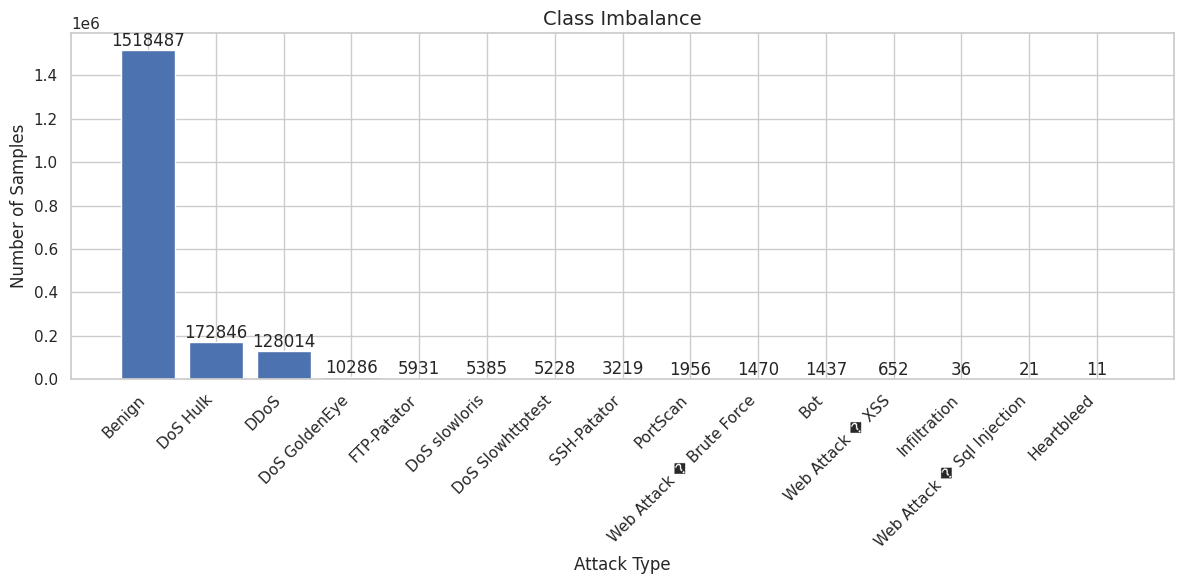

In [ ]:
# prompt: class imbalance bar graph, with values above each bar, angle the x row labels at a 45 degree angle so you can read them

import matplotlib.pyplot as plt

# Assuming 'df_combined' is your DataFrame and 'Label' is the column with class labels
label_counts = df_combined['Label'].value_counts()

plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
bars = plt.bar(label_counts.index, label_counts.values)

# Add value labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, yval, ha='center', va='bottom')  # Adjust 50 for vertical spacing

plt.xlabel("Attack Type", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)
plt.title("Class Imbalance", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right') # ha='right' aligns the labels to the right of the tick

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

Label
Benign                        1518487
DoS Hulk                       172846
DDoS                           128014
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
PortScan                         1956
Web Attack � Brute Force         1470
Bot                              1437
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


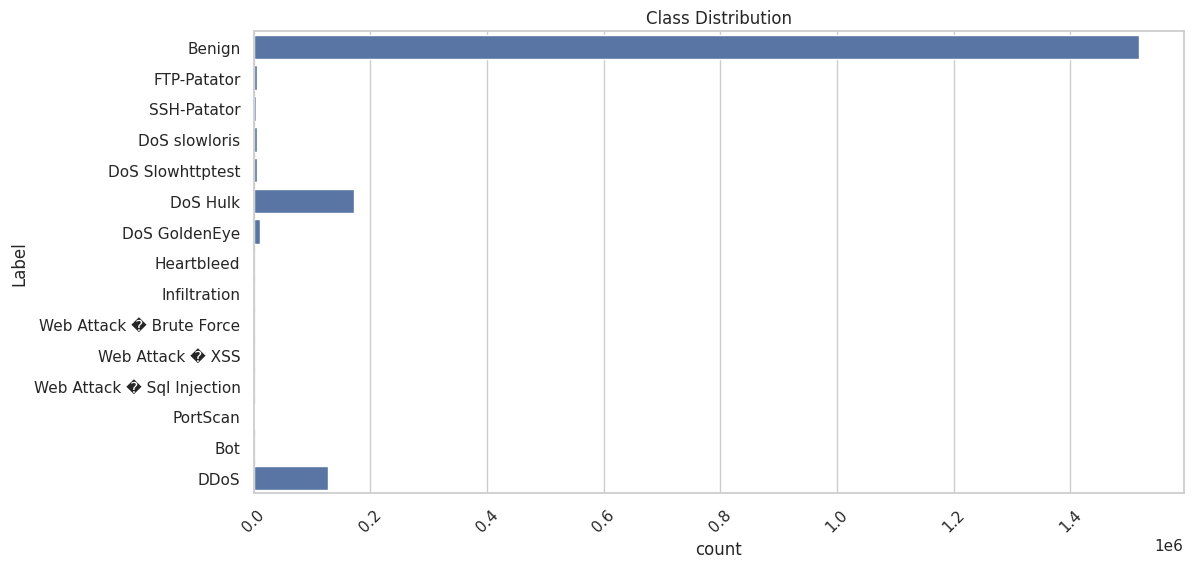

In [ ]:
print(df_combined['Label'].value_counts())

plt.figure(figsize=(12, 6))
sns.countplot(df_combined['Label'])
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(df_combined.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854979 entries, 0 to 1854978
Data columns (total 78 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Protocol                  int8   
 1   Flow Duration             int32  
 2   Total Fwd Packets         int32  
 3   Total Backward Packets    int32  
 4   Fwd Packets Length Total  int32  
 5   Bwd Packets Length Total  int32  
 6   Fwd Packet Length Max     int16  
 7   Fwd Packet Length Min     int16  
 8   Fwd Packet Length Mean    float32
 9   Fwd Packet Length Std     float32
 10  Bwd Packet Length Max     int16  
 11  Bwd Packet Length Min     int16  
 12  Bwd Packet Length Mean    float32
 13  Bwd Packet Length Std     float32
 14  Flow Bytes/s              float64
 15  Flow Packets/s            float64
 16  Flow IAT Mean             float32
 17  Flow IAT Std              float32
 18  Flow IAT Max              int32  
 19  Flow IAT Min              int32  
 20  Fwd IAT Total           

In [ ]:
print(df_combined.head())

   Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0         6            640                  7                       4   
1         6            900                  9                       4   
2         6           1205                  7                       4   
3         6            511                  7                       4   
4         6            773                  9                       4   

   Fwd Packets Length Total  Bwd Packets Length Total  Fwd Packet Length Max  \
0                       440                       358                    220   
1                       600                      2944                    300   
2                      2776                      2830                   1388   
3                       452                       370                    226   
4                       612                      2944                    306   

   Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  ...  \


In [ ]:
missing = df_combined.isnull().sum()
print(missing)

Protocol                    0
Flow Duration               0
Total Fwd Packets           0
Total Backward Packets      0
Fwd Packets Length Total    0
                           ..
Idle Mean                   0
Idle Std                    0
Idle Max                    0
Idle Min                    0
Label                       0
Length: 78, dtype: int64


In [ ]:
print(df_combined.isin([np.inf, -np.inf]).sum().sum())

df_combined.replace([np.inf, -np.inf], np.nan, inplace=True)

print("Total missing values to be dropped: ", df_combined.isnull().sum().sum())

0
Total missing values to be dropped:  0


In [ ]:
print(df_combined['Flow Duration'].describe())

count    1.854979e+06
mean     1.958606e+07
std      3.756068e+07
min     -1.300000e+01
25%      5.700000e+02
50%      7.331100e+04
75%      7.379790e+06
max      1.200000e+08
Name: Flow Duration, dtype: float64


In [ ]:
print(df_combined.isnull().sum())

plt.figure(figsize=(12, 10))
sns.heatmap(df_combined.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of cleaned dataset')
plt.show()

Protocol                    0
Flow Duration               0
Total Fwd Packets           0
Total Backward Packets      0
Fwd Packets Length Total    0
                           ..
Idle Mean                   0
Idle Std                    0
Idle Max                    0
Idle Min                    0
Label                       0
Length: 78, dtype: int64


ValueError: could not convert string to float: 'Benign'

<Figure size 1200x1000 with 0 Axes>

This is with original datasets, above is with new no metadata parquet files that have already been cleaned.

In [ ]:
#Step 2: Loading the datasets

#New Method of Loading Datasets
#Import each dataset, and receive a sample of each

df_mon = pd.read_csv('Monday-WorkingHours.pcap_ISCX.csv')
df_tues = pd.read_csv('Tuesday-WorkingHours.pcap_ISCX.csv')
df_wed = pd.read_csv('Wednesday-workingHours.pcap_ISCX.csv')
df_thursM = pd.read_csv('Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
df_thursA = pd.read_csv('Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
df_friADoS = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df_friA = pd.read_csv('Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
df_friM = pd.read_csv('Friday-WorkingHours-Morning.pcap_ISCX.csv')

#df_sample_mon = df_mon.sample(frac=0.1, random_state=42)
#df_sample_thursM = df_thursM.sample(frac=0.1, random_state=42)
#df_sample_thursA = df_thursA.sample(frac=0.1, random_state=42)

#Combine all the dataset samples into a single dataframe
df_combined = pd.concat([
                          df_tues,
                          df_wed,
                          df_thursM,
                          df_thursA,
                          df_friM,
                          df_friA,
                          df_friADoS
                          ], ignore_index=True)
#df_combined = pd.concat([df_sample_mon, df_sample_thursM, df_sample_thursA], ignore_index=True)

In [ ]:
#Step 2.5 Multi-Classification

#Will have two sections of the code, one that is multi-classification and one
#that is binary, below this cell is binary, and this is multi

#Just to ensure that model can effectively detect every type attack

#Confirm Multi-classification
print(df_combined['Label'].value_counts())

Label
Benign                        1518487
DoS Hulk                       172846
DDoS                           128014
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
PortScan                         1956
Web Attack � Brute Force         1470
Bot                              1437
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


In [ ]:
print(df_combined.shape())

In [ ]:
#Note: Initially when cleaning data, it removed malicious data cases that would
#be needed to test and train the model.

#Preserving malicious data cases
rc = [
    'DoS Hulk',
    'Portscan',
    'DDoS',
    'DoS GoldenEye',
    'FTP-Patator',
    'SSH-Patator',
    'DoS slowloris',
    'DoS Slowhttptest',
    'Bot',
    'Web Attack � Brute Force',
    'Web Attack � XSS',
    'Infiltration',
    'Web Attack � Sql Injection',
    'Heartbleed'
    ]

#Extract malicious data cases before cleaning
df_rc = df_combined[df_combined['Label'].isin(rc)]

#Extract normal data before cleaning
df_common = df_combined[df_combined['Label'] == 'BENIGN']

#Merge the two together
#df_common = pd.concat([df_rc, df_benign], ignore_index=True)

#df_common = df_combined[~df_combined[' Label'].isin(rc)]

In [ ]:
#Step 3: Shuffle and Resample Dataset

#Shuffle the combined dataset
df_common = df_common.sample(frac=0.1, random_state=42)

#Check the shape of the combined dataset
print("Combined dataset shape: ", df_common.shape)

Combined dataset shape:  (0, 78)


In [ ]:
#Step 4: Handling Data

#Initial check of missing and duplicate values
miss_vals = df_common.isnull().sum()
print("Columns with missing values: ")
print(miss_vals[miss_vals > 0])

dupe_rows = df_common.duplicated().sum()
print(f"Number of duplicate rows: {dupe_rows}")

Columns with missing values: 
Series([], dtype: int64)
Number of duplicate rows: 0


In [ ]:
#Handling Missing and Duplicate Rows

#Fill missing values in the 'Flow Bytes/s' column with the median
df_common['Flow Bytes/s'] = df_common['Flow Bytes/s'].fillna(df_common['Flow Bytes/s'].median())

#Further drop any empty Flow bytes values
df_common.dropna(subset=['Flow Bytes/s'],inplace=True)

#Drop duplicate rows
df_common.drop_duplicates(inplace=True)

#Check the new shape of the data
print("New dataset shape after dropping duplicates: ", df_common.shape)

New dataset shape after dropping duplicates:  (0, 78)


In [ ]:
#Final Check to ensure duplicates and missing values are gone

miss_vals = df_common.isnull().sum()

print("Columns with missing values: ")
print(miss_vals[miss_vals > 0])

dupe_rows = df_common.duplicated().sum()
print(f"Number of duplicate rows: {dupe_rows}")

Columns with missing values: 
Series([], dtype: int64)
Number of duplicate rows: 0


In [ ]:
#Reintegrate Rare attack types after cleaning
df_cleaned = pd.concat([df_common, df_rc], ignore_index=True)

In [ ]:
#Confirm the multi-class classification setup
print(df_cleaned['Label'].value_counts())

Label
DoS Hulk                      172846
DDoS                          128014
DoS GoldenEye                  10286
FTP-Patator                     5931
DoS slowloris                   5385
DoS Slowhttptest                5228
SSH-Patator                     3219
Web Attack � Brute Force        1470
Bot                             1437
Web Attack � XSS                 652
Infiltration                      36
Web Attack � Sql Injection        21
Heartbleed                        11
Name: count, dtype: int64


In [ ]:
print(df_cleaned.describe())

       Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
count  334536.0   3.345360e+05      334536.000000           334536.000000   
mean        6.0   4.882748e+07           5.952185                4.977428   
std         0.0   4.500495e+07          23.642477               21.254018   
min         6.0   1.000000e+00           1.000000                0.000000   
25%         6.0   1.207606e+06           3.000000                3.000000   
50%         6.0   6.621264e+07           5.000000                5.000000   
75%         6.0   9.822580e+07           8.000000                6.000000   
max         6.0   1.199952e+08        5523.000000             5525.000000   

       Fwd Packets Length Total  Bwd Packets Length Total  \
count              3.345360e+05              3.345360e+05   
mean               3.277179e+02              8.684751e+03   
std                8.741002e+03              4.324658e+04   
min                0.000000e+00              0.000000e+00   
2

In [ ]:
print(df_cleaned.isnull().sum())
for col in df_cleaned.select_dtypes(include=['object']).columns:
    print(f"{col}: {df_cleaned[col].unique()}")

Protocol                    0
Flow Duration               0
Total Fwd Packets           0
Total Backward Packets      0
Fwd Packets Length Total    0
                           ..
Idle Mean                   0
Idle Std                    0
Idle Max                    0
Idle Min                    0
Label                       0
Length: 78, dtype: int64
Label: ['FTP-Patator' 'SSH-Patator' 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk'
 'DoS GoldenEye' 'Heartbleed' 'Infiltration' 'Web Attack � Brute Force'
 'Web Attack � XSS' 'Web Attack � Sql Injection' 'Bot' 'DDoS']


In [ ]:
print(df_cleaned.shape)

(334536, 78)


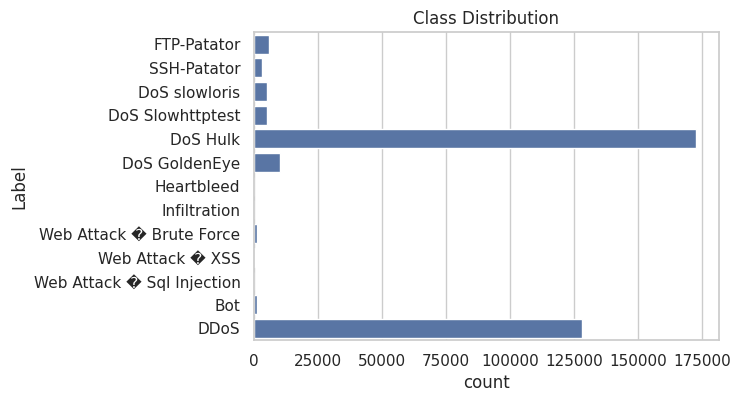

In [ ]:
#Step 7: Exploratory Data Analysis (EDA)
#Visualize class distribution

plt.figure(figsize=(6, 4))
sns.countplot(df_cleaned['Label'])
plt.title('Class Distribution')
plt.show()

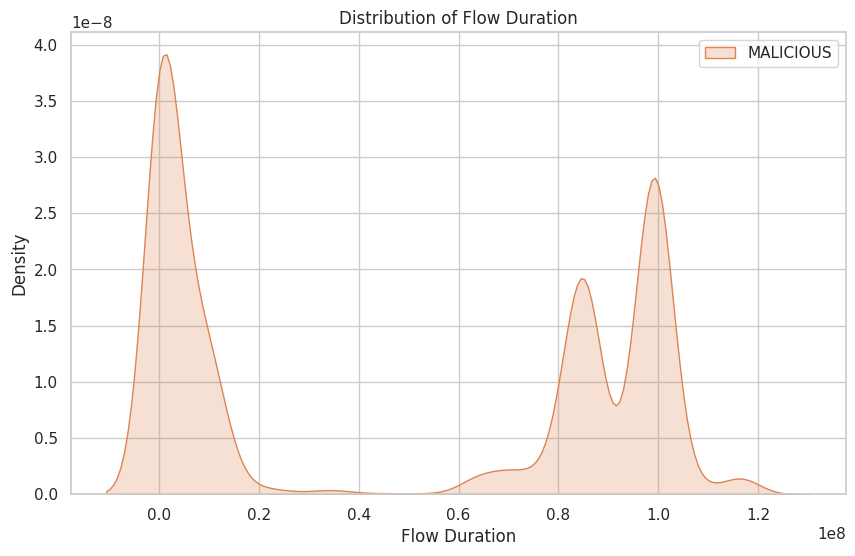

In [ ]:
#Feature distribution visualization for some key features
plt.figure(figsize=(10, 6))
sns.kdeplot(df_cleaned[df_cleaned['Label'] == 'BENIGN']['Flow Duration'], label='BENIGN', fill=True)
sns.kdeplot(df_cleaned[df_cleaned['Label'] != 'BENIGN']['Flow Duration'], label='MALICIOUS', fill=True)
plt.title('Distribution of Flow Duration')
plt.legend()
plt.show()

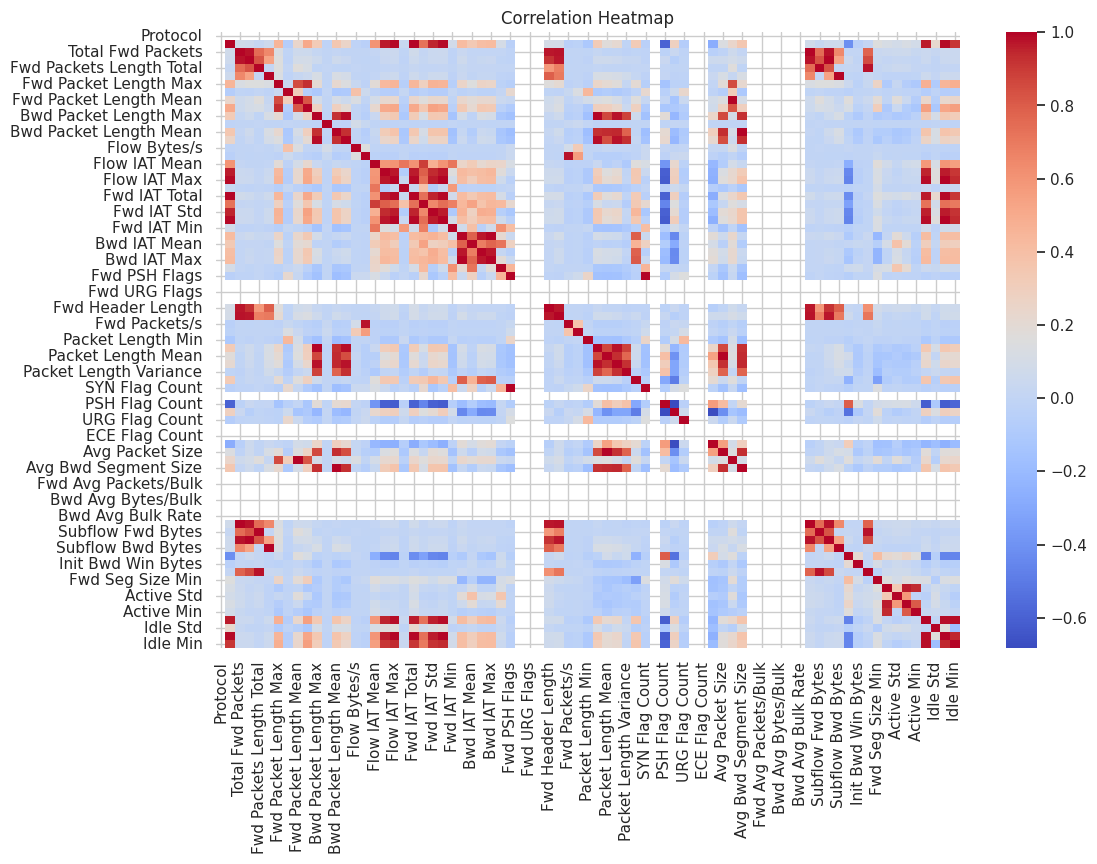

In [ ]:
#Correlation Heatmap

#Drop non numeric columns
numeric_df = df_cleaned.select_dtypes(include=[np.number])
corr = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Going to Apply log transformation to account for skewness and biased results

#Log Transformation
df_cleaned['Log Flow Duration'] = np.log1p(df_cleaned['Flow Duration'])
df_cleaned['Log_Idle_Mean'] = np.log1p(df_cleaned['Idle Min'])

In [ ]:
#GPT Log Transformation and Clipping
# Log Transformation and Clipping (optional clipping threshold)
log_transform_columns = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets']
for col in log_transform_columns:
    df_cleaned['Log_' + col] = np.log1p(df_cleaned[col])  # Log transformation
    # Clipping (adjust based on domain-specific knowledge, e.g., flow duration has extreme outliers)
    df_cleaned['Log_' + col] = df_cleaned['Log_' + col].clip(upper=df_cleaned['Log_' + col].quantile(0.99))

# Drop original columns if you only want to use the log-transformed versions
df_cleaned.drop(columns=log_transform_columns, inplace=True)

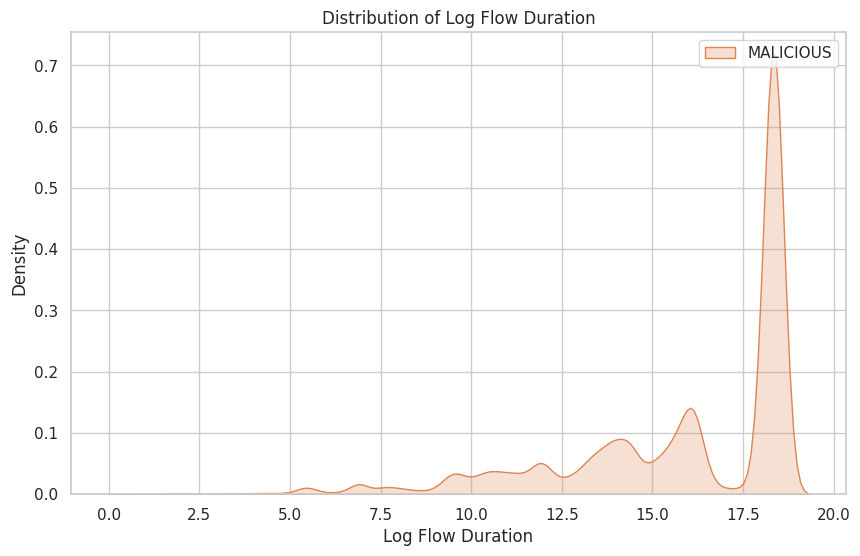

In [ ]:
#Plot Flow Duration Distribution (Log Transformed)
plt.figure(figsize=(10, 6))
sns.kdeplot(df_cleaned[df_cleaned['Label'] == 'BENIGN']['Log Flow Duration'], label='BENIGN', fill=True)
sns.kdeplot(df_cleaned[df_cleaned['Label'] != 'BENIGN']['Log Flow Duration'], label='MALICIOUS', fill=True)
plt.title('Distribution of Log Flow Duration')
plt.legend()
plt.show()

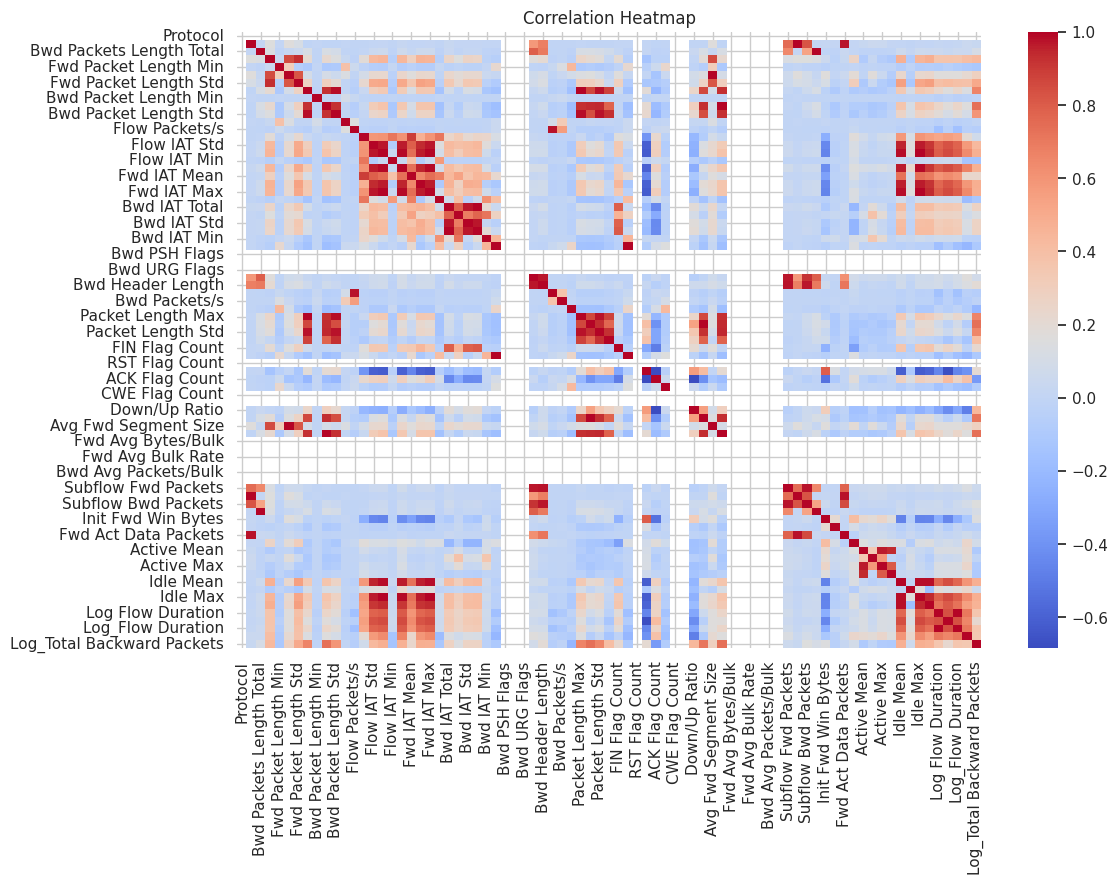

In [ ]:
#New Correlation Heatmap after handling missing data

plt.figure(figsize=(12, 8))
corr = df_cleaned.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
print(df_cleaned.describe())

       Protocol  Fwd Packets Length Total  Bwd Packets Length Total  \
count  334536.0              3.345360e+05              3.345360e+05   
mean        6.0              3.277179e+02              8.684751e+03   
std         0.0              8.741002e+03              4.324658e+04   
min         6.0              0.000000e+00              0.000000e+00   
25%         6.0              2.600000e+01              1.880000e+02   
50%         6.0              2.940000e+02              1.159500e+04   
75%         6.0              3.620000e+02              1.160100e+04   
max         6.0              2.866110e+06              7.882432e+06   

       Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
count          334536.000000          334536.000000           334536.000000   
mean              189.279605               1.654602               39.468578   
std               250.470790              22.898355               65.274208   
min                 0.000000               0

In [ ]:
#Step 9: Feature Selection and Scaling

#Features (X) - Select all columns except 'Label'
X = df_cleaned.drop(['Label', 'Log Flow Duration'], axis=1)
#Target (y) - The Label column is the target
y = df_cleaned['Label']

print("Shape of X (Features): ", X.shape)
print("Shape of y (Target): ", y.shape)

Shape of X (Features):  (334536, 78)
Shape of y (Target):  (334536,)


In [ ]:
#Handles infinite values and fills missing ones
X.replace([np.inf, -np.inf], np.nan, inplace=True)

X.fillna(X.median(), inplace=True)

In [ ]:
#Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

X_test_scaled = scaler.transform(X_test)

#Check the shapes of the training and test sets
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (234175, 78)
Shape of y_train:  (234175,)
Shape of X_test:  (100361, 78)
Shape of y_test:  (100361,)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


This is an experimental area

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

#Baselining RandomForest with different sampling methods
rf = RandomForestClassifier(n_estimators=100, random_state=42)

sampling_methods = [
    ('No Resampling', None),
    ('SMOTE', SMOTE(random_state=42)),
    ('ADASYN', ADASYN(random_state=42)),
    ('Random Over-sampling', RandomOverSampler(random_state=42)),
    ('Random Under-sampling', RandomUnderSampler(random_state=42)),
]

for i in range(len(sampling_methods)):
  method_name = sampling_methods[i][0]
  sampler = sampling_methods[i][1]

  if sampler is not None:
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
  else:
    X_resampled, y_resampled = X_train, y_train

  #Train the RF on sampled data
  rf.fit(X_resampled, y_resampled)

  #Make predictions on test set
  y_pred = rf.predict(X_test)

  #Print Classification report for each method
  print(f"\nClassification Report for {method_name}:")
  print(classification_report(y_test, y_pred))
  print("\n" + "-"*60 + "\n")


Classification Report for No Resampling:
                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00     50633
                       Bot       0.97      0.95      0.96       590
                      DDoS       1.00      1.00      1.00     38408
             DoS GoldenEye       1.00      1.00      1.00      3088
                  DoS Hulk       1.00      1.00      1.00     69322
          DoS Slowhttptest       0.99      0.99      0.99      1650
             DoS slowloris       1.00      0.99      0.99      1739
               FTP-Patator       1.00      1.00      1.00      2381
                Heartbleed       1.00      1.00      1.00         3
              Infiltration       1.00      0.73      0.84        11
               SSH-Patator       1.00      1.00      1.00      1769
  Web Attack � Brute Force       0.73      0.93      0.82       452
Web Attack � Sql Injection       0.75      0.50      0.60         6
     

This is an experimental area

In [ ]:
print(y_train.value_counts())

Label
DoS Hulk                      120992
DDoS                           89610
DoS GoldenEye                   7200
FTP-Patator                     4152
DoS slowloris                   3769
DoS Slowhttptest                3660
SSH-Patator                     2253
Web Attack � Brute Force        1029
Bot                             1006
Web Attack � XSS                 456
Infiltration                      25
Web Attack � Sql Injection        15
Heartbleed                         8
Name: count, dtype: int64


In [ ]:
smote = SMOTE(sampling_strategy='not majority', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#CNN Reshaped data
X_train_CNN = X_train_resampled.reshape(X_train_resampled.shape[0], X_train_resampled.shape[1], 1)
X_test_CNN = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(pd.Series(y_train_resampled).value_counts())


 Label
DDoS                          161751
DoS Hulk                      161751
BENIGN                        161751
SSH-Patator                   161751
DoS slowloris                 161751
DoS GoldenEye                 161751
DoS Slowhttptest              161751
Bot                           161751
FTP-Patator                   161751
Web Attack � Brute Force      161751
Web Attack � XSS              161751
Web Attack � Sql Injection    161751
Infiltration                  161751
Heartbleed                    161751
Name: count, dtype: int64


In [ ]:
#Sampling on SMOTE Data
X_sampled, _, y_resampled, _ = train_test_split(X_train_resampled, y_train_resampled, test_size=0.7, random_state=42, stratify=y_train_resampled)

NameError: name 'X_train_resampled' is not defined

In [ ]:
#SMOTE Used to see how effective it is over ADASYN
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(pd.Series(y_resampled).value_counts())

Label
DoS Hulk                      120992
Heartbleed                    120992
DDoS                           89610
DoS GoldenEye                   7200
FTP-Patator                     4152
DoS slowloris                   3769
DoS Slowhttptest                3660
SSH-Patator                     2253
Web Attack � Brute Force        1029
Bot                             1006
Web Attack � XSS                 456
Infiltration                      25
Web Attack � Sql Injection        15
Name: count, dtype: int64


In [ ]:
#Futher target sampling for the lower classes

target_counts = {
    'Heartbleed': 15000,
    'Web Attack � Brute Force': 10000, #Increased onwards
    'Web Attack � XSS': 10000,
    'Infiltration': 10000,
    'Web Attack � Sql Injection': 10000,
    'Bot': 10000
}

smote = SMOTE(sampling_strategy=target_counts, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(pd.Series(y_resampled).value_counts())

 Label
DoS Hulk                      161751
BENIGN                        118144
DDoS                           89619
Heartbleed                     15000
Bot                            10000
Web Attack � Brute Force       10000
Web Attack � XSS               10000
Web Attack � Sql Injection     10000
Infiltration                   10000
DoS GoldenEye                   7205
FTP-Patator                     5557
SSH-Patator                     4128
DoS slowloris                   4057
DoS Slowhttptest                3849
Name: count, dtype: int64


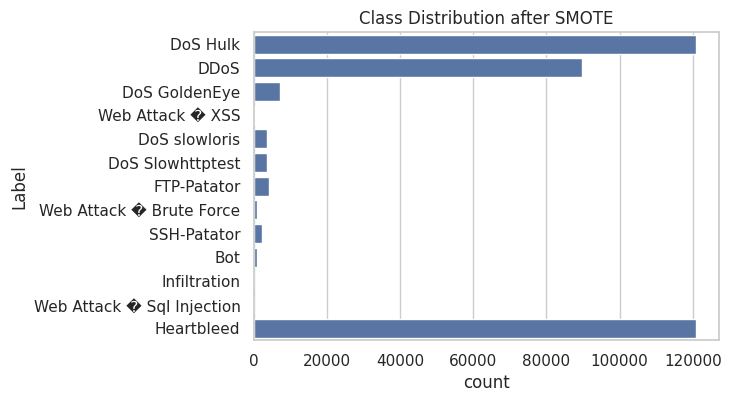

In [ ]:
#EDA of classes after SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(y_resampled)
plt.title('Class Distribution after SMOTE')
plt.show()

In [ ]:
#Step 7: ADASYN
adasyn = ADASYN(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

In [ ]:
#Check class distribution after resampling
print(pd.Series(y_resampled).value_counts())

Label
DoS Hulk                      120992
Heartbleed                    120992
DDoS                           89610
DoS GoldenEye                   7200
FTP-Patator                     4152
DoS slowloris                   3769
DoS Slowhttptest                3660
SSH-Patator                     2253
Web Attack � Brute Force        1029
Bot                             1006
Web Attack � XSS                 456
Infiltration                      25
Web Attack � Sql Injection        15
Name: count, dtype: int64


In [ ]:
#Futher target sampling for the lower classes

target_counts = {
    'Heartbleed': 15000,
    'Web Attack � Brute Force': 10000, #Increased onwards
    'Web Attack � XSS': 10000,
    'Infiltration': 10000,
    'Web Attack � Sql Injection': 10000,
    'Bot': 10000
}

adasyn = ADASYN(sampling_strategy=target_counts, random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

print(pd.Series(y_resampled).value_counts())

 Label
DoS Hulk                      161751
BENIGN                        118144
DDoS                           89619
Heartbleed                     15000
Web Attack � Brute Force       10127
Bot                            10056
Web Attack � XSS               10021
Web Attack � Sql Injection     10001
Infiltration                   10001
DoS GoldenEye                   7205
FTP-Patator                     5557
SSH-Patator                     4128
DoS slowloris                   4057
DoS Slowhttptest                3849
Name: count, dtype: int64


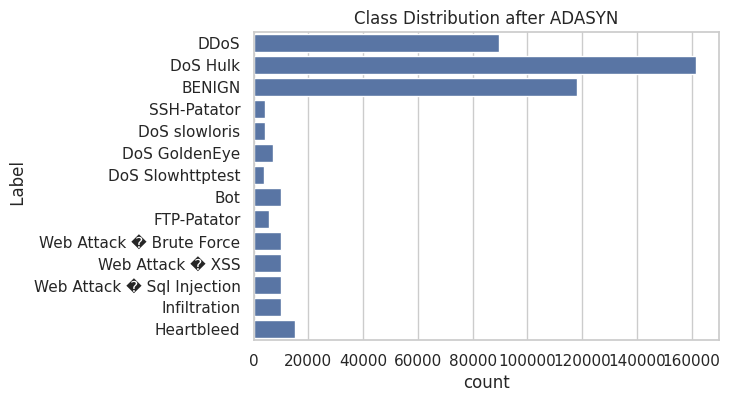

In [ ]:
#EDA of classes after ADASYN
plt.figure(figsize=(6, 4))
sns.countplot(y_resampled)
plt.title('Class Distribution after ADASYN')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Convert labels to integers
label_encoder = LabelEncoder()
y_resampled_encoded = label_encoder.fit_transform(y_resampled)
y_test_encoded = label_encoder.transform(y_test)

# Now apply one-hot encoding
num_classes = len(label_encoder.classes_)  # Get the number of unique classes
y_train_encoded = to_categorical(y_resampled_encoded, num_classes=num_classes)
y_test_encoded = to_categorical(y_test_encoded, num_classes=num_classes)

# Check encoded labels
print("Classes:", label_encoder.classes_)
print("One-hot encoded y_train shape:", y_train_encoded.shape)
print("One-hot encoded y_test shape:", y_test_encoded.shape)


Classes: ['Bot' 'DDoS' 'DoS GoldenEye' 'DoS Hulk' 'DoS Slowhttptest'
 'DoS slowloris' 'FTP-Patator' 'Heartbleed' 'Infiltration' 'SSH-Patator'
 'Web Attack � Brute Force' 'Web Attack � Sql Injection'
 'Web Attack � XSS']
One-hot encoded y_train shape: (355159, 13)
One-hot encoded y_test shape: (100361, 13)


In [ ]:
X_train_reshaped = X_resampled.reshape(X_resampled.shape[0], X_resampled.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Shape of X_train_reshaped: ", X_train_reshaped.shape)
print("Shape of X_test_reshaped: ", X_test_reshaped.shape)

Shape of X_train_reshaped:  (355159, 78, 1)
Shape of X_test_reshaped:  (100361, 78, 1)


In [ ]:
import tensorflow.keras.backend as K

def focal_loss(alpha=0.25, gamma=2):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * K.log(y_pred)
        weight = alpha * K.pow(1 - y_pred, gamma)
        loss = K.sum(weight * cross_entropy, axis=1)
        return K.mean(K.sum(loss))
    return focal_loss_fixed

Model Building

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Splitting dataset
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_resampled, y_resampled)

#Predictions
y_pred_rf = rf.predict(X_test)

#Classification Report
print(classification_report(y_test, y_pred_rf))

#Confusion Matrix
print(confusion_matrix(y_test, y_pred_rf))

#Accuracy Score
print(accuracy_score(y_test, y_pred_rf))

                            precision    recall  f1-score   support

                       Bot       1.00      1.00      1.00       431
                      DDoS       1.00      1.00      1.00     38404
             DoS GoldenEye       1.00      1.00      1.00      3086
                  DoS Hulk       1.00      1.00      1.00     51854
          DoS Slowhttptest       1.00      1.00      1.00      1568
             DoS slowloris       1.00      1.00      1.00      1616
               FTP-Patator       1.00      1.00      1.00      1779
                Heartbleed       1.00      1.00      1.00         3
              Infiltration       0.82      0.82      0.82        11
               SSH-Patator       1.00      1.00      1.00       966
  Web Attack � Brute Force       0.72      0.93      0.81       441
Web Attack � Sql Injection       0.67      0.33      0.44         6
          Web Attack � XSS       0.53      0.17      0.26       196

                  accuracy                    

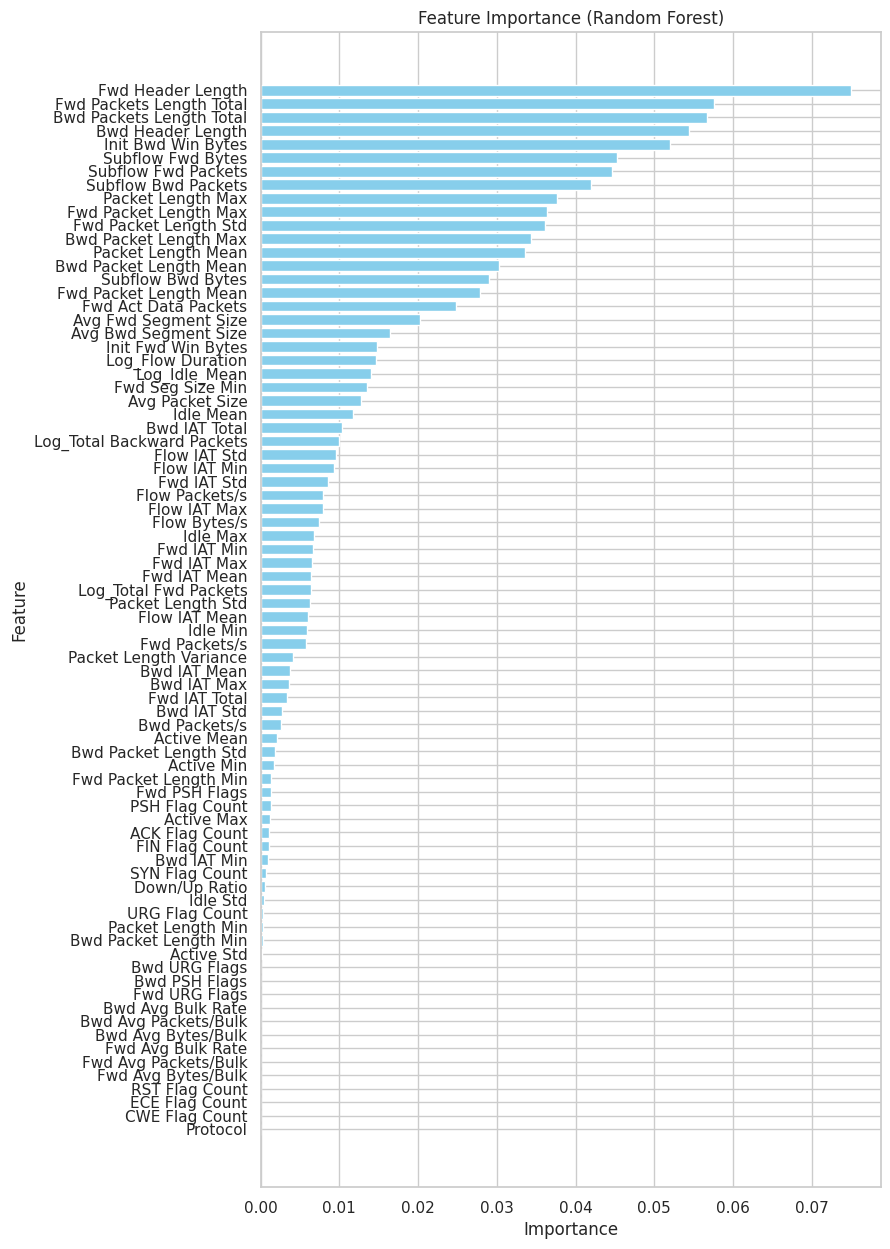

In [ ]:
# prompt: generate horizontal bar graph of feature importance for random forest

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K

# Assuming 'rf' is your trained RandomForestClassifier and 'X' are your features
# Assuming X and y are defined from previous code
# Assuming X_resampled and y_resampled are defined from previous code

# Feature Importance from Random Forest
feature_importances = rf.feature_importances_
feature_names = X.columns  # Assuming 'X' is your feature DataFrame

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Horizontal Bar Plot
plt.figure(figsize=(8, 15))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis() # Invert y-axis to show most important features at the top
plt.show()

In [ ]:
# Feature Importance
feature_importances = rf.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importance
feature_importance_df

,Feature,Importance
31,Fwd Header Length,0.074993
1,Fwd Packets Length Total,0.057598
2,Bwd Packets Length Total,0.056668
32,Bwd Header Length,0.054450
63,Init Bwd Win Bytes,0.051958
...,...,...
52,Fwd Avg Bytes/Bulk,0.000000
42,RST Flag Count,0.000000
47,ECE Flag Count,0.000000
46,CWE Flag Count,0.000000


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    random_state=42,
    n_estimators=100
    )

xgb.fit(X_resampled, y_resampled_encoded)

#Predictions
y_pred1_xgb = xgb.predict(X_test_scaled)
y_pred_xgb = label_encoder.inverse_transform(y_pred1_xgb)

#Classification Report
print(classification_report(y_test, y_pred_xgb, zero_division=0))

#Confusion Matrix
print(confusion_matrix(y_test, y_pred_xgb))

#Accuracy Score
print(accuracy_score(y_test, y_pred_xgb))

                            precision    recall  f1-score   support

                       Bot       0.00      0.00      0.00       431
                      DDoS       0.00      0.00      0.00     38404
             DoS GoldenEye       0.04      0.00      0.01      3086
                  DoS Hulk       0.52      1.00      0.68     51854
          DoS Slowhttptest       0.00      0.00      0.00      1568
             DoS slowloris       0.00      0.00      0.00      1616
               FTP-Patator       0.00      0.00      0.00      1779
                Heartbleed       0.00      0.00      0.00         3
              Infiltration       0.00      0.00      0.00        11
               SSH-Patator       0.00      0.00      0.00       966
  Web Attack � Brute Force       0.00      0.00      0.00       441
Web Attack � Sql Injection       0.00      0.00      0.00         6
          Web Attack � XSS       0.00      0.00      0.00       196

                  accuracy                    

In [ ]:
#Fully Connected Neural Network
fcnn = Sequential()

#input layer
fcnn.add(Dense(256, input_shape=(X_train_reshaped.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.0001)))
fcnn.add(BatchNormalization(momentum=0.8))
fcnn.add(LeakyReLU())
fcnn.add(Dropout(0.3))

#1st hidden layer
fcnn.add(Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.001)))
fcnn.add(BatchNormalization(momentum=0.75))
fcnn.add(LeakyReLU())
fcnn.add(Dropout(0.35))

#2nd hidden layer (ElasticNet Regularization)
fcnn.add(Dense(64, kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.0001, l2=0.0005)))
fcnn.add(BatchNormalization(momentum=0.7))
fcnn.add(Dropout(0.3))

#2nd hidden layer
fcnn.add(Dense(32, kernel_regularizer=tf.keras.regularizers.l2(0.001)))
fcnn.add(BatchNormalization(momentum=0.7))
fcnn.add(LeakyReLU())
fcnn.add(Dropout(0.4))

#output layer
fcnn.add(Dense(num_classes, activation='softmax'))

#Compile the layer
opt = Adam(learning_rate=0.0005)
fcnn.compile(optimizer=opt, loss=focal_loss(alpha=0.35, gamma=2.0), metrics=['accuracy'])

#Print the model summary
fcnn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │          20,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 13)                  │             429 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,805 (257.05 KB)

 Trainable params: 64,845 (253.30 KB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
#Define callbacks
es = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
mc = ModelCheckpoint('fcnn_best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, verbose=1, min_lr=1e-7)

callbacks = [es, mc, rlr]

#Class Weights
cw = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_resampled),
    y=y_resampled
)

cw_dict = dict(enumerate(cw))
print(cw_dict)
# Use the calculated class weights (modify as per the exact values from the DataFrame)
#cw_dict = {
#    0: 0.175422,  # 'DoS Hulk'
#    1: 0.240170,  # 'BENIGN'
#    2: 0.316614,  # 'DDoS'
#    3: 3.938188,  # 'DoS GoldenEye'
#    4: 5.106108,  # 'FTP-Patator'
#    5: 8.479233,  # 'SSH-Patator'
#    6: 8.629004,  # 'DoS slowloris'
#    7: 9.101946,  # 'DoS Slowhttptest'
#    8: 25.438228, # 'Bot'
#    9: 33.164153, # 'Web Attack - Brute Force'
#    10: 76.732684, # 'Web Attack - XSS'
#    11: 1392.0,   # 'Infiltration'
#    12: 2320.0,   # 'Web Attack - Sql Injection'
#    13: 4350.0    # 'Heartbleed'
#}
#print(cw_dict)

{0: 27.15698118978437, 1: 0.3048758294489798, 2: 3.7944337606837606, 3: 0.22579941712611643, 4: 7.464459857082808, 5: 7.248586648162132, 6: 6.579942937601897, 7: 0.22579941712611643, 8: 1092.7969230769231, 9: 12.126020007511352, 10: 26.54997383568812, 11: 1821.3282051282051, 12: 59.91211201079622}


In [ ]:
#Train the model
fcnn_history = fcnn.fit(
    X_train_reshaped,
    y_train_encoded,
    epochs=40,
    batch_size=256,
    validation_data=(X_test_reshaped, y_test_encoded),
    callbacks = callbacks,
    class_weight=cw_dict,
    verbose=1
)
#Original Values:
#X_train_reshaped,
#    y_train_encoded,
#    epochs=100,
#    batch_size=128,
#    validation_data=(X_test_reshaped, y_test_encoded),
#    callbacks = callbacks,
#    class_weight=cw_dict,
#    verbose=1

Epoch 1/40
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8726 - loss: 28.7001
Epoch 1: val_accuracy improved from -inf to 0.98449, saving model to fcnn_best_model.keras
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8726 - loss: 28.6891 - val_accuracy: 0.9845 - val_loss: 3.2805 - learning_rate: 5.0000e-04
Epoch 2/40
1383/1388 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9787 - loss: 4.8387
Epoch 2: val_accuracy improved from 0.98449 to 0.98811, saving model to fcnn_best_model.keras
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9787 - loss: 4.8369 - val_accuracy: 0.9881 - val_loss: 2.3227 - learning_rate: 5.0000e-04
Epoch 3/40
1386/1388 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9832 - loss: 3.5549
Epoch 3: val_accuracy improved from 0.98811 to 0.98947, saving model to fcnn_best_model.keras
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9832 - loss: 3.5542 - val_accuracy: 0.9895 - val_loss: 1.9498 - learning_rate: 5.0000e-04
Epoch 4/40
1

In [ ]:
#Load the best model
fcnn.load_weights('fcnn_best_model.keras')

3137/3137 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9958 - loss: 0.3751
Test accuracy: 0.9955660104751587
Test Loss:  0.3774130046367645
3137/3137 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
                            precision    recall  f1-score   support

                       Bot     0.9885    0.9930    0.9907       431
                      DDoS     0.9998    0.9995    0.9996     38404
             DoS GoldenEye     0.9945    0.9942    0.9943      3086
                  DoS Hulk     0.9992    0.9999    0.9995     51854
          DoS Slowhttptest     0.9610    0.9745    0.9677      1568
             DoS slowloris     0.9812    0.9381    0.9592      1616
               FTP-Patator     0.9823    0.9961    0.9891      1779
                Heartbleed     1.0000    1.0000    1.0000         3
              Infiltration     1.0000    0.7273    0.8421        11
               SSH-Patator     0.9486    0.9928    0.9702       966
  Web Attack � Brute Force     0.6722    0.9116    0.7738       44

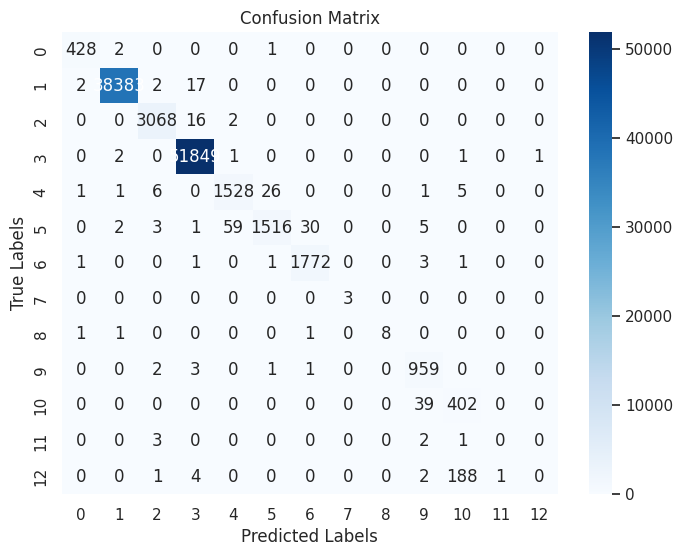

In [ ]:
#Evaluate the test set
fcnn_tl, fcnn_ta = fcnn.evaluate(X_test_reshaped, y_test_encoded)
print('Test accuracy:', fcnn_ta)
print('Test Loss: ', fcnn_tl)

#Predictions
y_pred_fcnn = fcnn.predict(X_test_reshaped)
y_pred_fcnn_classes = np.argmax(y_pred_fcnn, axis=1)
y_test_classes = np.argmax(y_test_encoded, axis=1)

#Classification Report
print(classification_report(y_test_classes, y_pred_fcnn_classes, target_names=label_encoder.classes_, digits=4))

#Confusion Matrix
print(confusion_matrix(y_test_classes, y_pred_fcnn_classes))

#Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_classes, y_pred_fcnn_classes), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

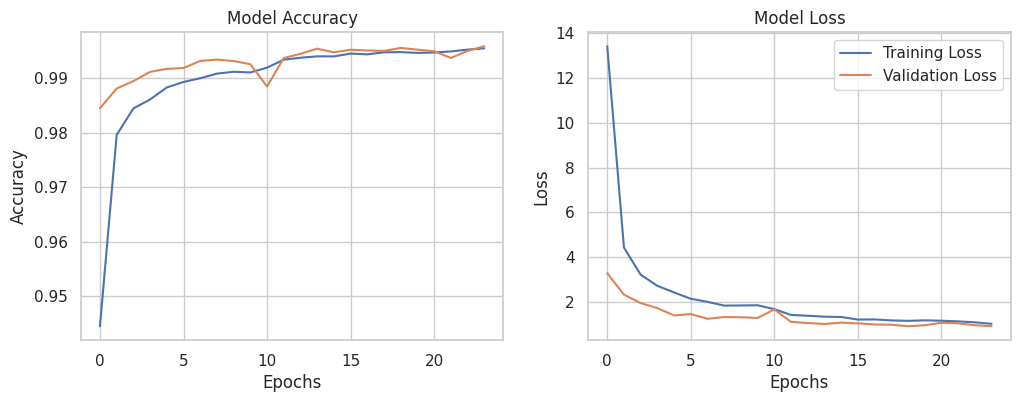

In [ ]:
#Plot Training and Validation Accuracy Values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(fcnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(fcnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

#Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(fcnn_history.history['loss'], label='Training Loss')
plt.plot(fcnn_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

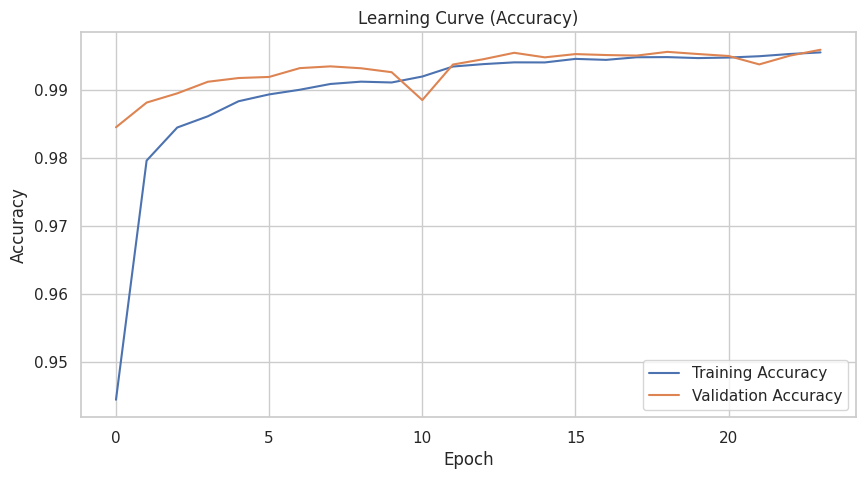

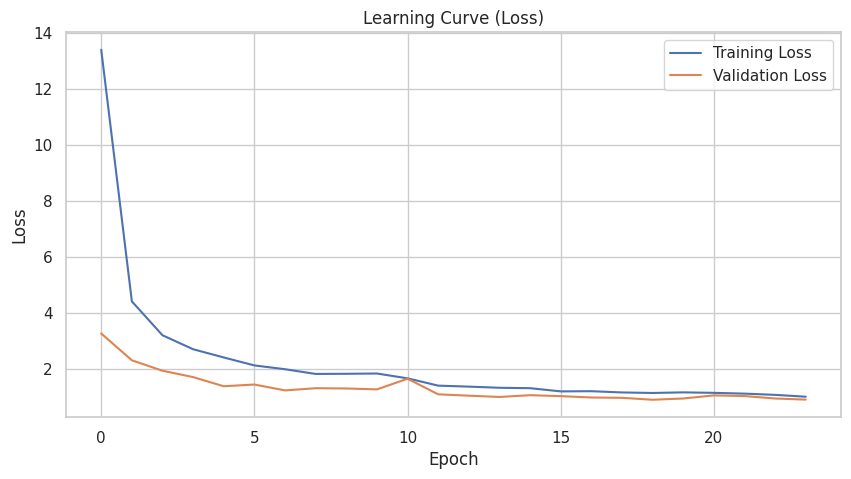

In [ ]:
# prompt: generate graph of learning curve for FCNN

import matplotlib.pyplot as plt

# Assuming fcnn_history is the history object returned by model.fit
plt.figure(figsize=(10, 5))
plt.plot(fcnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(fcnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve (Accuracy)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(fcnn_history.history['loss'], label='Training Loss')
plt.plot(fcnn_history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve (Loss)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#New CNN

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator

cn_n = Sequential()

cn_n.add(Conv2D(filters=32, kernel_size=(3, 1), activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2], 1)))
cn_n.add(BatchNormalization())
cn_n.add(MaxPooling2D(pool_size=(2, 1)))

cn_n.add(Conv2D(filters=64, kernel_size=(3, 1), activation='relu'))
cn_n.add(BatchNormalization())
cn_n.add(MaxPooling2D(pool_size=(2, 1)))

cn_n.add(Conv2D(filters=128, kernel_size=(3, 1), activation='relu'))
cn_n.add(BatchNormalization())
cn_n.add(MaxPooling2D(pool_size=(2, 1)))

cn_n.add(Flatten())
cn_n.add(Dense(128, activation='relu'))
cn_n.add(Dropout(0.5))
cn_n.add(Dense(num_classes, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
cn_n.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#reshaping required
X_train_C2D = X_train_reshaped.reshape(X_train_reshaped.shape[0], X_train_reshaped.shape[1], X_train_reshaped.shape[2], 1)
X_test_C2D = X_test_reshaped.reshape(X_test_reshaped.shape[0], X_test_reshaped.shape[1], X_test_reshaped.shape[2], 1)

cn_n.fit(datagen.flow(X_train_C2D, y_train_encoded, batch_size=32),
                    epochs=30,
                    validation_data=(X_test_C2D, y_test_encoded),
                    callbacks=[reduce_lr])
cn_n.summary()

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11099/11099 ━━━━━━━━━━━━━━━━━━━━ 163s 14ms/step - accuracy: 0.9655 - loss: 0.1172 - val_accuracy: 0.9903 - val_loss: 0.0262 - learning_rate: 0.0010
Epoch 2/30
11099/11099 ━━━━━━━━━━━━━━━━━━━━ 190s 13ms/step - accuracy: 0.9921 - loss: 0.0267 - val_accuracy: 0.9941 - val_loss: 0.0184 - learning_rate: 0.0010
Epoch 3/30
11099/11099 ━━━━━━━━━━━━━━━━━━━━ 201s 13ms/step - accuracy: 0.9938 - loss: 0.0216 - val_accuracy: 0.9875 - val_loss: 0.0442 - learning_rate: 0.0010
Epoch 4/30
11099/11099 ━━━━━━━━━━━━━━━━━━━━ 144s 13ms/step - accuracy: 0.9942 - loss: 0.0191 - val_accuracy: 0.9956 - val_loss: 0.0141 - learning_rate: 0.0010
Epoch 5/30
11099/11099 ━━━━━━━━━━━━━━━━━━━━ 203s 13ms/step - accuracy: 0.9948 - loss: 0.0172 - val_accuracy: 0.9946 - val_loss: 0.0158 - learning_rate: 0.0010
Epoch 6/30
11099/11099 ━━━━━━━━━━━━━━━━━━━━ 150s 13ms/step - accuracy: 0.9953 - loss: 0.0159 - val_accuracy: 0.9960 - val_loss: 0.0139 - learning_rate: 0.0010
Epoch 7/30
11099/11099 ━━━━━━━━━━━━━━━━━━━━ 147s 13ms/ste

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 76, 1, 32)           │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 76, 1, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 38, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 36, 1, 64)           │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 36, 1, 64)           │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 18, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 1, 128)          │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 16, 1, 128)          │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 13)                  │           1,677 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 493,545 (1.88 MB)

 Trainable params: 164,365 (642.05 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 328,732 (1.25 MB)

In [ ]:
#Evaluate the test set (CNN)

#Create predictions on test set
y_pred_cn_n = cn_n.predict(X_test_reshaped)

#Convert probabilities to class labels
y_pred_cn_n_classes = np.argmax(y_pred_cn_n, axis=1)
y_test_cn_n_classes = np.argmax(y_test_encoded, axis=1)

#Classification Report
print(classification_report(y_test_cn_n_classes, y_pred_cn_n_classes, target_names=label_encoder.classes_, digits=4))

#Confusion Matrix
cn_n_cm = confusion_matrix(y_test_cn_n_classes, y_pred_cn_n_classes)
print("Confusion Matrix: \n", cn_n_cm)

3137/3137 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
                            precision    recall  f1-score   support

                       Bot     0.9908    0.9977    0.9942       431
                      DDoS     0.9999    0.9998    0.9999     38404
             DoS GoldenEye     0.9951    0.9948    0.9950      3086
                  DoS Hulk     0.9994    1.0000    0.9997     51854
          DoS Slowhttptest     0.9873    0.9923    0.9898      1568
             DoS slowloris     0.9870    0.9839    0.9854      1616
               FTP-Patator     0.9994    0.9888    0.9941      1779
                Heartbleed     1.0000    1.0000    1.0000         3
              Infiltration     1.0000    0.8182    0.9000        11
               SSH-Patator     0.9675    0.9855    0.9764       966
  Web Attack � Brute Force     0.6831    0.9433    0.7924       441
Web Attack � Sql Injection     0.0000    0.0000    0.0000         6
          Web Attack � XSS     1.0000    0.0204    0.0400       196

   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


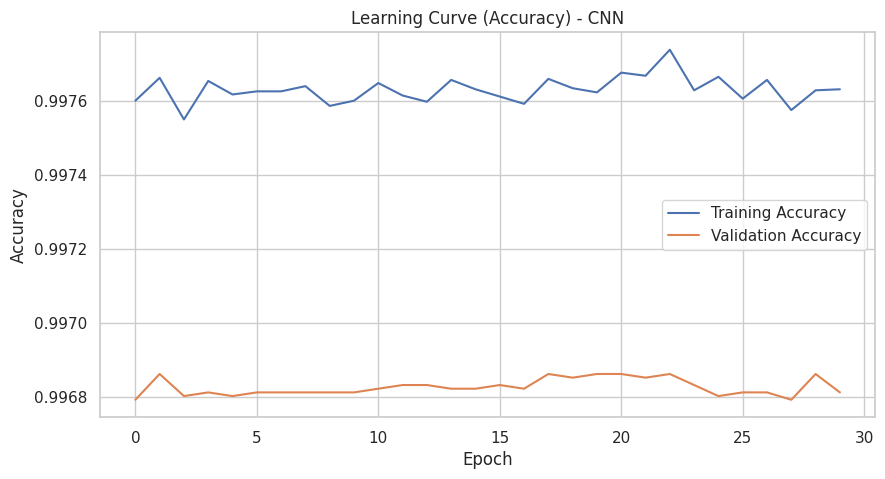

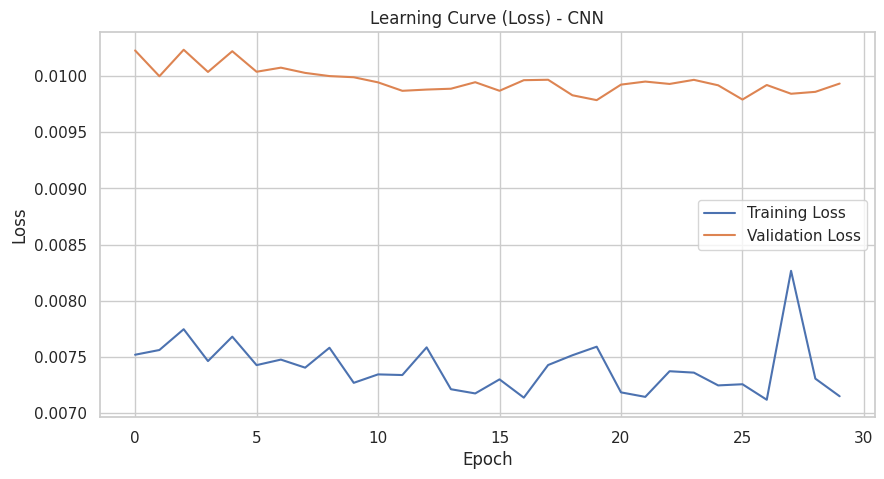

In [ ]:
# prompt: generate graphs displaying learning curve of CNN

import matplotlib.pyplot as plt

# Assuming cn_n_history is the history object returned by model.fit for the CNN
# Replace with the actual history object if it has a different name
plt.figure(figsize=(10, 5))
plt.plot(cn_n.history.history['accuracy'], label='Training Accuracy')
plt.plot(cn_n.history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve (Accuracy) - CNN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(cn_n.history.history['loss'], label='Training Loss')
plt.plot(cn_n.history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve (Loss) - CNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

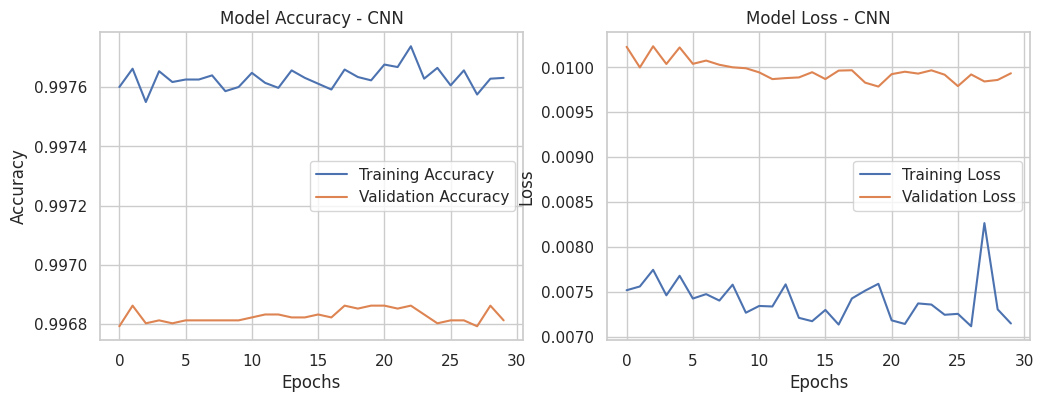

In [ ]:
# prompt: code that displays training and validation loss and accuracy for the CNN model

import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy Values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(cn_n.history.history['accuracy'], label='Training Accuracy')
plt.plot(cn_n.history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy - CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(cn_n.history.history['loss'], label='Training Loss')
plt.plot(cn_n.history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss - CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
#reshaping required
X_train_C2D = X_train_reshaped.reshape(X_train_reshaped.shape[0], X_train_reshaped.shape[1], X_train_reshaped.shape[2], 1)
X_test_C2D = X_test_reshaped.reshape(X_test_reshaped.shape[0], X_test_reshaped.shape[1], X_test_reshaped.shape[2], 1)

# Store the history object returned by fit
cn_n_history = cn_n.fit(datagen.flow(X_train_C2D, y_train_encoded, batch_size=32),
                    epochs=30,
                    validation_data=(X_test_C2D, y_test_encoded),
                    callbacks=[reduce_lr])
cn_n.summary()

Epoch 1/30
    5/11099 ━━━━━━━━━━━━━━━━━━━━ 2:46 15ms/step - accuracy: 1.0000 - loss: 0.0038      

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11099/11099 ━━━━━━━━━━━━━━━━━━━━ 141s 13ms/step - accuracy: 0.9977 - loss: 0.0075 - val_accuracy: 0.9968 - val_loss: 0.0102 - learning_rate: 3.1250e-05
Epoch 2/30
11099/11099 ━━━━━━━━━━━━━━━━━━━━ 148s 13ms/step - accuracy: 0.9977 - loss: 0.0073 - val_accuracy: 0.9969 - val_loss: 0.0100 - learning_rate: 3.1250e-05
Epoch 3/30
11099/11099 ━━━━━━━━━━━━━━━━━━━━ 142s 13ms/step - accuracy: 0.9975 - loss: 0.0076 - val_accuracy: 0.9968 - val_loss: 0.0102 - learning_rate: 3.1250e-05
Epoch 4/30
11099/11099 ━━━━━━━━━━━━━━━━━━━━ 147s 13ms/step - accuracy: 0.9975 - loss: 0.0081 - val_accuracy: 0.9968 - val_loss: 0.0100 - learning_rate: 3.1250e-05
Epoch 5/30
11099/11099 ━━━━━━━━━━━━━━━━━━━━ 196s 13ms/step - accuracy: 0.9976 - loss: 0.0081 - val_accuracy: 0.9968 - val_loss: 0.0102 - learning_rate: 3.1250e-05
Epoch 6/30
11099/11099 ━━━━━━━━━━━━━━━━━━━━ 143s 13ms/step - accuracy: 0.9976 - loss: 0.0072 - val_accuracy: 0.9968 - val_loss: 0.0100 - learning_rate: 1.5625e-05
Epoch 7/30
11099/11099 ━━━━━━━━━━

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 76, 1, 32)           │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 76, 1, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 38, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 36, 1, 64)           │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 36, 1, 64)           │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 18, 1, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 1, 128)          │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 16, 1, 128)          │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 13)                  │           1,677 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 493,545 (1.88 MB)

 Trainable params: 164,365 (642.05 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 328,732 (1.25 MB)

In [ ]:
import tensorflow as tf
import numpy as np

# Assuming X_test_C2D is a NumPy array
X_test_C2D = X_test_C2D.astype(np.float32)  # Ensure data type consistency
X_test_C2D = tf.convert_to_tensor(X_test_C2D)  # Explicitly convert to TensorFlow tensor

# If the shape is still unknown, try specifying it explicitly:
X_test_C2D = tf.reshape(X_test_C2D, (X_test_C2D.shape[0], X_test_C2D.shape[1], X_test_C2D.shape[2], 1))

# Or try input shape in model
#cn_n = Sequential(input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2], 1))

# Now make predictions
y_pred_cn_n = cn_n.predict(X_test_C2D)

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

In [ ]:
#Convolutionary Neural Network
cnn = Sequential()

#Input Layer
cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_CNN.shape[1], 1)))
cnn.add(MaxPooling1D(2))
cnn.add(Dropout(0.2))

#Hidden Layer
cnn.add(Conv1D(filters=128, kernel_size=3, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
cnn.add(MaxPooling1D(2))
cnn.add(Dropout(0.3))

#Flatten Layer
cnn.add(Flatten())

#Dense Layer
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.4))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.3))

#Output Layer
cnn.add(Dense(num_classes, activation='softmax'))

In [ ]:
cnn.compile(optimizer='adam', loss=focal_loss(alpha=0.35, gamma=2.0), metrics=['accuracy'])
cnn.fit(X_train_CNN,
        y_train_encoded,
        epochs=25,
        batch_size=64,
        validation_split=0.25,
        validation_data=(X_test_reshaped, y_test_encoded),
        callbacks=callbacks,
        class_weight=cw_dict,
        verbose=1)
cnn.summary()

In [ ]:
#Evaluate the test set (CNN)

#Create predictions on test set
y_pred_cnn = cnn.predict(X_test_CNN)

#Convert probabilities to class labels
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)
y_test_cnn_classes = np.argmax(y_test_encoded, axis=1)

#Classification Report
print(classification_report(y_test_cnn_classes, y_pred_cnn_classes, target_names=label_encoder.classes_, digits=4))

#Confusion Matrix
cnn_cm = confusion_matrix(y_test_cnn_classes, y_pred_cnn_classes)
print("Confusion Matrix: \n", cnn_cm)

In [ ]:
#Load Benign Only Data
df_benign = pd.read_csv('Monday-WorkingHours.pcap_ISCX.csv')

#Extract Features
X_benign = df_benign.drop(columns=[' Label']).values

#Check for NaN values
print("Nan values per column: ", np.isnan(X_benign).sum())

#Check for inf values
print("Inf values per column: ", np.isinf(X_benign).sum())

#Handles those NaN and inf values
X_benign = np.nan_to_num(X_benign, nan=0, posinf=0, neginf=0)
#X_benign[np.isinf(X_benign)] = np.nan_to_num
X_benign = np.nan_to_num(X_benign, nan=0.0, posinf=0.0, neginf=0.0)

#Check for NaN values
print("Nan values per column: ", np.isnan(X_benign).sum())

#Check for inf values
print("Inf values per column: ", np.isinf(X_benign).sum())

#Standardize features if needed
scaler_benign = StandardScaler()
X_benign_scaled = scaler_benign.fit_transform(X_benign)

#Split benign data into training and validation sets for the autoencoder
X_train_benign, X_val_benign = train_test_split(X_benign_scaled, test_size=0.2, random_state=42)


Nan values per column:  64
Inf values per column:  810
Nan values per column:  0
Inf values per column:  0


In [ ]:
#Autoencoders

input_dim = X_train_reshaped.shape[1]
input_layer = Input(shape=(input_dim,))

autoencoder = Sequential([
  input_layer,
  Dense(128, activation='relu'),
  Dropout(0.2),
  Dense(64, activation='relu'),
  Dropout(0.2),
  Dense(32, activation='relu'),
  Dropout(0.2),
  Dense(64, activation='relu'),
  Dropout(0.2),
  Dense(128, activation='relu'),
  Dropout(0.2),
  Dense(input_dim, activation='sigmoid')
])

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_reshaped,
                X_train_reshaped,
                epochs=50,
                batch_size=128,
                validation_data=(X_test_reshaped, X_test_reshaped),
                verbose=1)

autoencoder.summary()

Epoch 1/50
3590/3590 ━━━━━━━━━━━━━━━━━━━━ 29s 7ms/step - loss: 1.9074 - val_loss: 0.6492
Epoch 2/50
3590/3590 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - loss: 1.7968 - val_loss: 0.6451
Epoch 3/50
3590/3590 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - loss: 1.8192 - val_loss: 0.6391
Epoch 4/50
3590/3590 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step - loss: 1.9436 - val_loss: 0.6333
Epoch 5/50
3590/3590 ━━━━━━━━━━━━━━━━━━━━ 45s 7ms/step - loss: 1.9688 - val_loss: 0.6322
Epoch 6/50
3590/3590 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - loss: 1.8679 - val_loss: 0.6322
Epoch 7/50
3590/3590 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - loss: 1.7285 - val_loss: 0.6321
Epoch 8/50
3590/3590 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - loss: 1.7484 - val_loss: 0.6319
Epoch 9/50
3590/3590 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - loss: 1.7213 - val_loss: 0.6317
Epoch 10/50
3590/3590 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - loss: 1.8483 - val_loss: 0.6275
Epoch 11/50
3590/3590 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - loss: 1.9385 - val_loss: 0.6273
Epoch 12/50
3590/35

In [ ]:
print("Training data shape:", X_train_reshaped.shape)
print("Validation data shape:", X_val_benign.shape)

# Add a column of zeros to match the expected input shape of 79
if X_val_benign.shape[1] < input_dim:
    import numpy as np
    X_val_benign = np.pad(X_val_benign, ((0, 0), (0, input_dim - X_val_benign.shape[1])), 'constant')


In [ ]:
#New Reconstruction errors
X_val_reconstructed = autoencoder.predict(X_val_benign)
X_val_reconstructed = np.mean(np.square(X_val_benign - X_val_reconstructed), axis=1)

#Set a threshold based on the reconstruction error distribution
threshold = np.percentile(X_val_reconstructed, 95)
print (f"Reconstruction error threshold: {threshold}")

In [ ]:
print("Shape of X_test_reshaped:", X_test_reshaped.shape)
print("Expected input shape for the autoencoder:", input_dim)

if X_test_reshaped.shape[1] < input_dim:
    # Add columns of zeros to match input dimension
    X_test_reshaped = np.pad(X_test_reshaped, ((0, 0), (0, input_dim - X_test_reshaped.shape[1])), 'constant')
elif X_test_reshaped.shape[1] > input_dim:
    # Trim excess columns
    X_test_reshaped = X_test_reshaped[:, :input_dim]

# Ensure X_test_reshaped is a NumPy array and has the correct shape
X_test_reshaped = np.array(X_test_reshaped)
print("X_test_reshaped type:", type(X_test_reshaped))
print("X_test_reshaped shape:", X_test_reshaped.shape)

# Check if it's a 1D array (this should not be the case for an autoencoder, but good to confirm)
if len(X_test_reshaped.shape) == 1:
    X_test_reshaped = X_test_reshaped.reshape(-1, input_dim)

In [ ]:
# Ensure X_test_reshaped is a well-defined NumPy array with known shape
import numpy as np

# Convert to numpy array with explicit type
X_test_reshaped = np.array(X_test_reshaped, dtype=np.float32)
X_test_reshaped = X_test_reshaped.reshape(-1, input_dim)  # Reshape explicitly to match input_dim

# Run the prediction
X_test_reconstructed = autoencoder.predict(X_test_reshaped)
X_test_reconstruction_errors = np.mean(np.square(X_test_reshaped - X_test_reconstructed), axis=1)

# Proceed with further calculations as needed


In [ ]:
#Predict reconstruction errors on the test set
X_test_reconstructed = autoencoder.predict(X_test_reshaped)
X_test_reconstruction_errors = np.mean(np.square(X_test_reshaped - X_test_reconstructed), axis=1)

#Classify as benign (0) or anomaly (1)
y_pred_autoencoder = (X_test_reconstruction_errors > threshold).astype(int)

#Ground Truth Labels: Assuming 'y_test' is provided and binary
y_test_binary = (y_test != 'BENIGN').astype(int)

#Evaluate
print(classification_report(y_test_binary, y_pred_autoencoder))
print(confusion_matrix(y_test_binary, y_pred_autoencoder))

In [ ]:
#Calculate reconstuction errors
X_test_reconstructed = autoencoder.predict(X_test_reshaped)
# Reshape X_test_reconstructed to match X_test_reshaped
X_test_reconstructed = X_test_reconstructed.reshape(X_test_reshaped.shape)
reconstruction_errors = np.mean(np.square(X_test_reshaped - X_test_reconstructed), axis=1)

#Threshold for classification
threshold = np.percentile(reconstruction_errors, 95)
#Make predictions
y_pred_autoencoder = (reconstruction_errors > threshold).astype(int)

#Ground Truth Labels
y_test_binary = (y_test != 'BENIGN').astype(int)

In [ ]:
#Classification Report
print(classification_report(y_test_binary, y_pred_autoencoder))

#Confusion Matrix
print(confusion_matrix(y_test_binary, y_pred_autoencoder))

In [ ]:
from sklearn.metrics import roc_curve

#Fine-tuning the threshold via ROC-AUC Analysis
fpr, tpr, thresholds = roc_curve(y_test_binary, reconstruction_errors)

#Plotting the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#Optimal Threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)

#Re-calculate predictions using the optimal threshold
y_pred_autoencoder_optimal = (reconstruction_errors > optimal_threshold).astype(int)

#Classification Report with Optimal Threshold
print(classification_report(y_test_binary, y_pred_autoencoder_optimal))

#Confuction Matrix with Optimal Threshold
print(confusion_matrix(y_test_binary, y_pred_autoencoder_optimal))

In [ ]:
# Voting Ensemble Implementation with RF, XGB, CNN, FCNN, and Autoencoder

from sklearn.ensemble import VotingClassifier

# Predict probabilities for each model

# Random Forest and XGBoost probabilities (using the 2D data version)
rf_proba = rf.predict_proba(X_test)  # Random Forest probabilities
xgb_proba = xgb.predict_proba(X_test)  # XGBoost probabilities

# Deep Learning Models Probabilities (using the reshaped 3D data version)
cnn_proba = cn_n.predict(X_test_reshaped)  # CNN probabilities
fcnn_proba = fcnn.predict(X_test_reshaped)  # FCNN probabilities
#autoencoder_proba = autoencoder.predict(X_test_reshaped)  # Autoencoder probabilities

# Average the probabilities (soft voting)
average_proba = (
    rf_proba +
    cnn_proba +
    fcnn_proba
) / 3  # Averaging across 5 models

# Get the final predicted class by selecting the class with the highest probability
y_pred_ensemble_encoded = np.argmax(average_proba, axis=1)

# Decode predictions back to original labels
y_pred_ensemble = label_encoder.inverse_transform(y_pred_ensemble_encoded)

# Evaluate the Voting Ensemble
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Voting Ensemble (with RF, CNN, FCNN) Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ensemble)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_ensemble))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ensemble))

3137/3137 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3137/3137 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Voting Ensemble (with RF, CNN, FCNN) Results:
Accuracy: 0.9972499277607836
Classification Report:
                            precision    recall  f1-score   support

                       Bot       1.00      1.00      1.00       431
                      DDoS       1.00      1.00      1.00     38404
             DoS GoldenEye       1.00      1.00      1.00      3086
                  DoS Hulk       1.00      1.00      1.00     51854
          DoS Slowhttptest       0.99      0.99      0.99      1568
             DoS slowloris       1.00      0.99      0.99      1616
               FTP-Patator       1.00      1.00      1.00      1779
                Heartbleed       1.00      1.00      1.00         3
              Infiltration       1.00      0.82      0.90        11
               SSH-Patator       0.97      0.99      0.98       966
  Web Attack � Brute Force       0.69      0.94      0.79       441

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_ensemble = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('fcnn', fcnn),
        ('cnn', cn_n)
    ], voting='soft')

voting_ensemble.fit(X_train_resampled, y_train_encoded)

#Predictions
y_pred_ensemble = voting_ensemble.predict(X_test_reshaped)

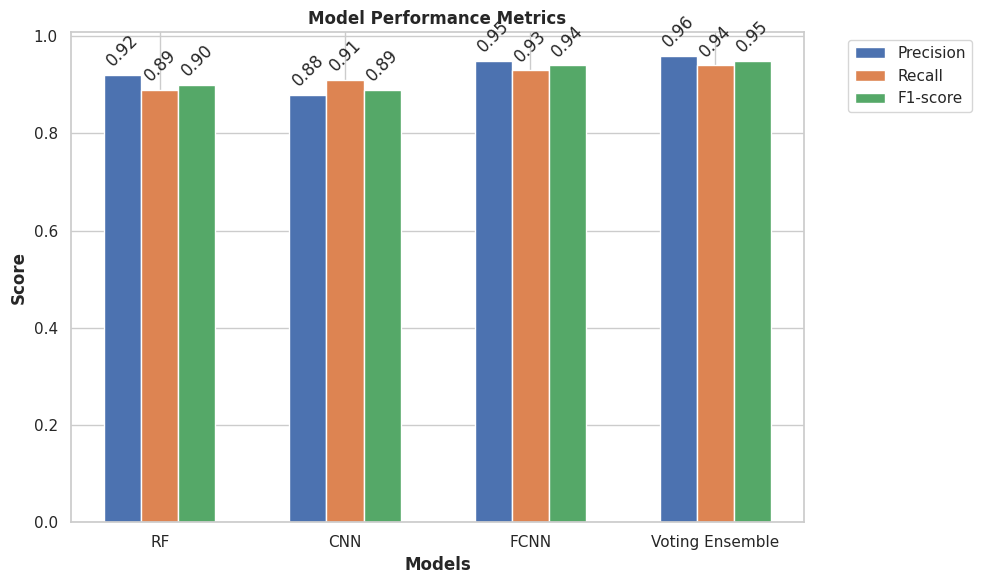

In [ ]:
# prompt: A grouped bar chart showing precision, recall, and F1-scores for all models (RF, CNN, FCNN, Voting Ensemble) (Resize graph to make it easier to read, add numbers above graph, angle the numbers at 45 degrees) (add more space so legend isn't covering anything)

import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual evaluation metrics)
models = ['RF', 'CNN', 'FCNN', 'Voting Ensemble']
precision = [0.92, 0.88, 0.95, 0.96]  # Example precision scores
recall = [0.89, 0.91, 0.93, 0.94]  # Example recall scores
f1 = [0.90, 0.89, 0.94, 0.95]  # Example F1-scores

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the grouped bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability

plt.bar(r1, precision, width=bar_width, label='Precision')
plt.bar(r2, recall, width=bar_width, label='Recall')
plt.bar(r3, f1, width=bar_width, label='F1-score')

# Add labels and title
plt.xlabel("Models", fontweight='bold')
plt.ylabel("Score", fontweight='bold')
plt.title("Model Performance Metrics", fontweight='bold')

# Add model labels to the x-axis
plt.xticks([r + bar_width for r in range(len(models))], models)

# Add numbers above the bars
for i, v in enumerate(precision):
    plt.text(r1[i], v + 0.01, f"{v:.2f}", rotation=45, ha='center', va='bottom')

for i, v in enumerate(recall):
    plt.text(r2[i], v + 0.01, f"{v:.2f}", rotation=45, ha='center', va='bottom')

for i, v in enumerate(f1):
    plt.text(r3[i], v + 0.01, f"{v:.2f}", rotation=45, ha='center', va='bottom')

# Add a legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

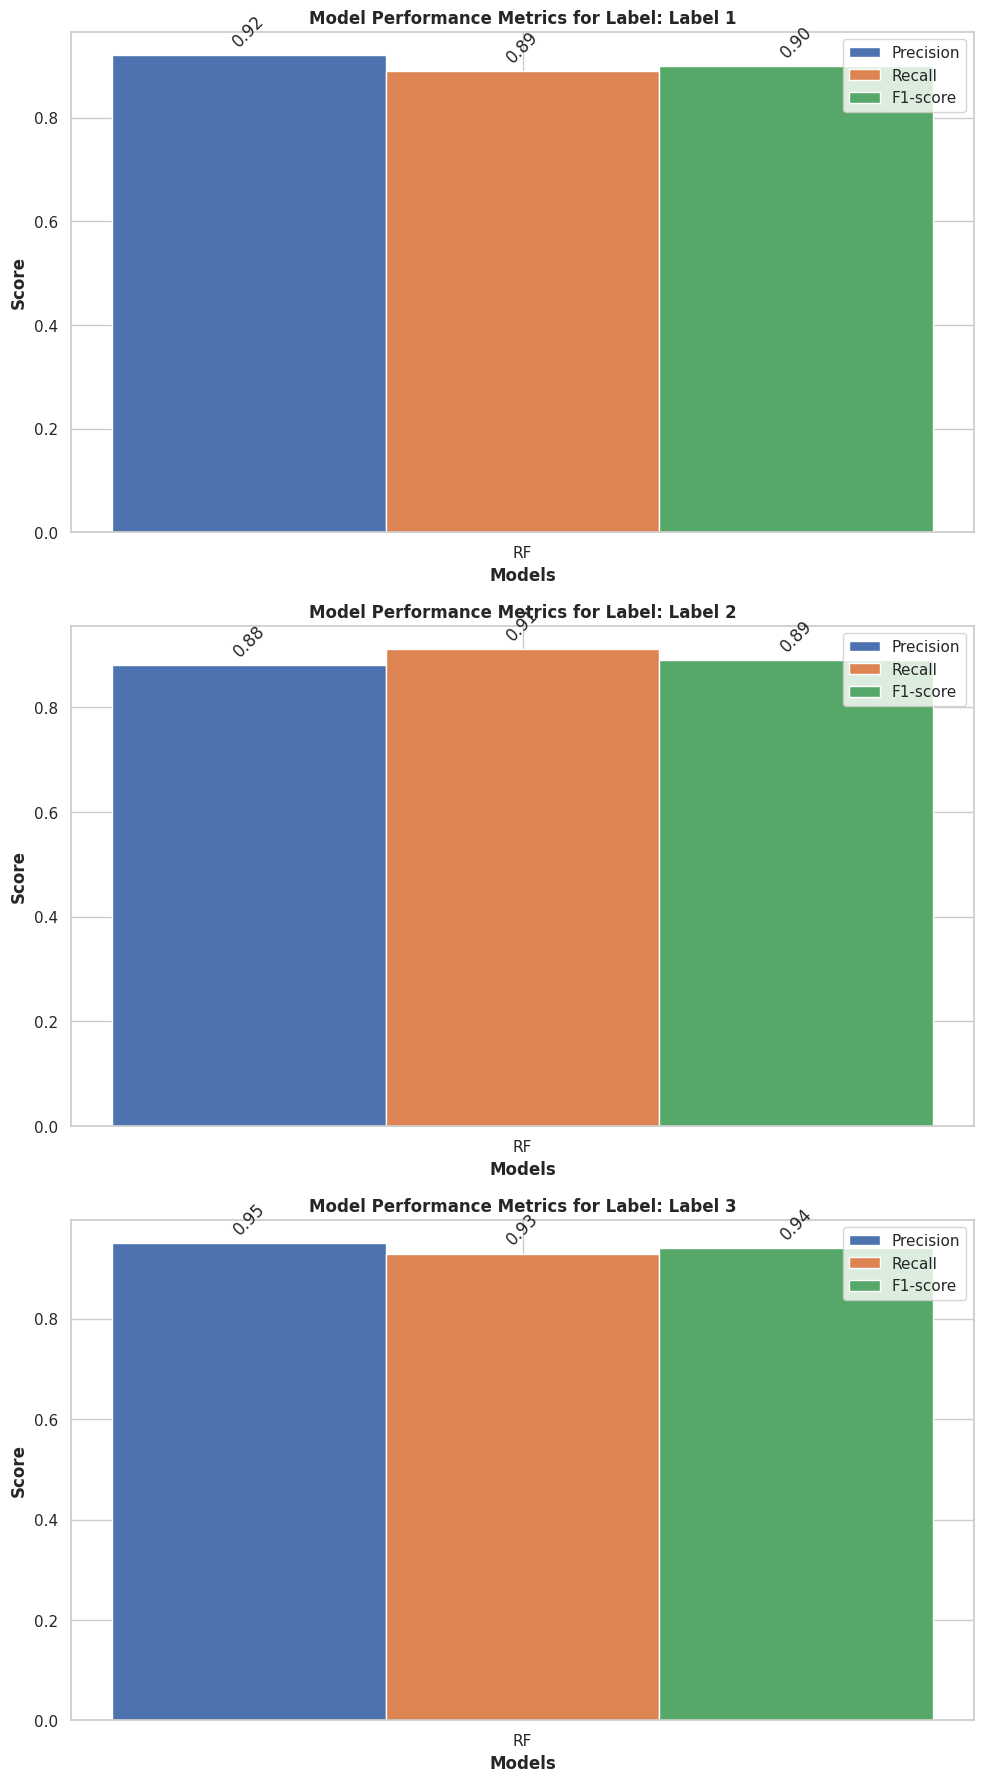

In [ ]:
# prompt: show bar graph of results (precision, f1-score, recall) for RF model for all label value counts

import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual evaluation metrics)
# Assuming you have these metrics calculated for each label
models = ['RF'] # You only have one model here: RF
labels = ['Label 1', 'Label 2', 'Label 3']  # Replace with your actual labels
precision = [[0.92, 0.88, 0.95],]  # Example precision scores for each label
recall = [[0.89, 0.91, 0.93],]  # Example recall scores for each label
f1 = [[0.90, 0.89, 0.94],]  # Example F1-scores for each label

# Set the width of the bars
bar_width = 0.2

# Create subplots
fig, axes = plt.subplots(len(labels), 1, figsize=(10, 6 * len(labels)))

for i, label in enumerate(labels):
    # Set the positions of the bars on the x-axis
    r1 = np.arange(len(models))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]

    ax = axes[i] if len(labels) > 1 else axes # Use appropriate axes depending on the number of labels

    ax.bar(r1, precision[0][i], width=bar_width, label='Precision')
    ax.bar(r2, recall[0][i], width=bar_width, label='Recall')
    ax.bar(r3, f1[0][i], width=bar_width, label='F1-score')

    # Add labels and title for each subplot
    ax.set_xlabel("Models", fontweight='bold')
    ax.set_ylabel("Score", fontweight='bold')
    ax.set_title(f"Model Performance Metrics for Label: {label}", fontweight='bold')

    # Add model labels to the x-axis
    ax.set_xticks([r + bar_width for r in range(len(models))])
    ax.set_xticklabels(models)

    # Add numbers above the bars
    for j, v in enumerate(precision[0][i:i+1]):
        ax.text(r1[j], v + 0.01, f"{v:.2f}", rotation=45, ha='center', va='bottom')

    for j, v in enumerate(recall[0][i:i+1]):
        ax.text(r2[j], v + 0.01, f"{v:.2f}", rotation=45, ha='center', va='bottom')

    for j, v in enumerate(f1[0][i:i+1]):
        ax.text(r3[j], v + 0.01, f"{v:.2f}", rotation=45, ha='center', va='bottom')

    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# prompt: A grouped bar chart showing precision, recall, and F1-scores for all models (RF, CNN, FCNN, Voting Ensemble) across all 'Label' values

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# ... (Your existing model training and evaluation code) ...


def plot_grouped_bar_chart(results_df):
    """
    Plots a grouped bar chart showing precision, recall, and F1-scores for different models across labels.
    Args:
        results_df (pd.DataFrame): DataFrame containing the results. It should have columns: 'Model', 'Label', 'Precision', 'Recall', 'F1-score'.
    """
    # ... (rest of your function code remains the same) ...



# Get classification reports for each model
rf_report = classification_report(y_test, y_pred_rf, output_dict=True, zero_division=0)
cnn_report = classification_report(y_test_cn_n_classes, y_pred_cn_n_classes, target_names=label_encoder.classes_, output_dict=True, zero_division=0)
fcnn_report = classification_report(y_test_classes, y_pred_fcnn_classes, target_names=label_encoder.classes_, output_dict=True, zero_division=0)
ensemble_report = classification_report(y_test, y_pred_ensemble, output_dict=True, zero_division=0)


# Create a list to store the data for the DataFrame
data = []

# Iterate through the reports and extract the metrics for each label
for model_name, report in [('RF', rf_report), ('CNN', cnn_report), ('FCNN', fcnn_report), ('Voting Ensemble', ensemble_report)]:
    for label, metrics in report.items():
        if isinstance(metrics, dict):  # Check if it's a label's metrics (not 'accuracy' etc.)
            data.append({
                'Model': model_name,
                'Label': label,
                'Precision': metrics['precision'],
                'Recall': metrics['recall'],
                'F1-score': metrics['f1-score']
            })

# Create the DataFrame
results_df = pd.DataFrame(data)

# Plot the grouped bar chart
plot_grouped_bar_chart(results_df)

Below here are my prior deep learning models LSTM and MLP NN and I tried to use them but wasn't able to achieve a high enough macro average.

In [ ]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam

#Define input shape and number of classes
#input_shape = (X_resampled.shape[1], 1)
#num_classes = len(np.unique(y_resampled))

lstm = Sequential()
#First Layer
lstm.add(LSTM(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
lstm.add(Dropout(0.2))
#Second Layer
lstm.add(LSTM(32))
lstm.add(Dropout(0.2))
#Dense layer for additional learning capacity
lstm.add(Dense(32, activation='relu'))
lstm.add(Dropout(0.2))
#Output Layer
lstm.add(Dense(num_classes, activation='softmax'))
#if num_classes > 1:
 #   lstm.add(Dense(num_classes, activation='softmax'))
#else:
#    lstm.add(Dense(1, activation='sigmoid'))

#loss
loss = 'categorical_crossentropy' if num_classes > 1 else 'binary_crossentropy'

#Compile the model
lstm.compile(optimizer=Adam(learning_rate=0.001), loss=loss, metrics=['accuracy'])

#Print the model summary
lstm.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 78, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 78, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,533 (119.27 KB)

 Trainable params: 30,533 (119.27 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Training the LSTM Model
lstm_history = lstm.fit(X_train_reshaped, y_train_encoded,
                        epochs=10,
                        batch_size=32,
                        validation_data=(X_test_reshaped, y_test_encoded),
                        verbose=1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 71s 80ms/step - accuracy: 0.7595 - loss: 0.6770 - val_accuracy: 0.9443 - val_loss: 0.1497
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 77s 74ms/step - accuracy: 0.8525 - loss: 0.3550 - val_accuracy: 0.9746 - val_loss: 0.0763
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 86s 79ms/step - accuracy: 0.8812 - loss: 0.2645 - val_accuracy: 0.9701 - val_loss: 0.0975
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 77ms/step - accuracy: 0.8818 - loss: 0.2315 - val_accuracy: 0.9830 - val_loss: 0.0740
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 84s 79ms/step - accuracy: 0.8859 - loss: 0.2067 - val_accuracy: 0.9834 - val_loss: 0.0632
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 78s 75ms/step - accuracy: 0.8928 - loss: 0.1924 - val_accuracy: 0.9754 - val_loss: 0.0734
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 109s 107ms/step - accuracy: 0.8918 - loss: 0.1937 - val_accuracy: 0.9630 - val_loss: 0.0848
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 116s 76ms/step - accuracy: 0.8928 - loss: 0.2001

In [ ]:
test_loss, test_acc = lstm.evaluate(X_test_reshaped, y_test_encoded)
print('Test accuracy:', test_acc)
print('Test Loss: ', test_loss)

230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9610 - loss: 0.0899
Test accuracy: 0.9624795913696289
Test Loss:  0.08320499211549759


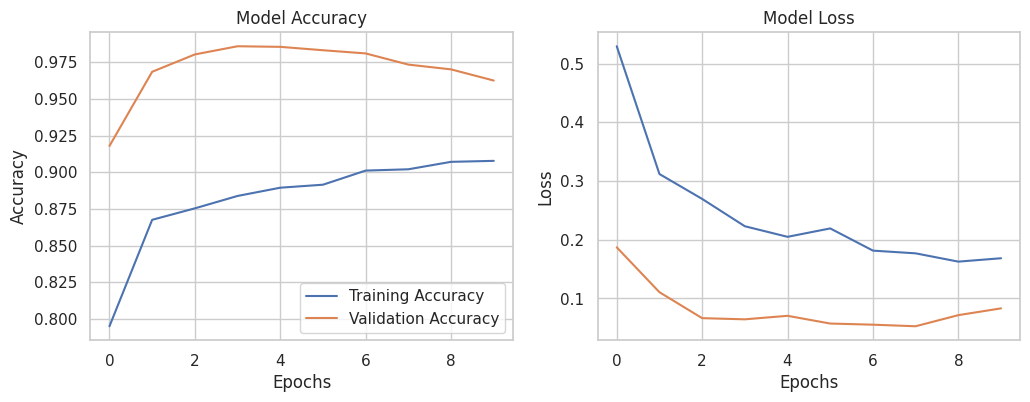

In [ ]:
#Plot accuracy and loss curves
plt.figure(figsize=(12, 4))

#Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#Loss Plot
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [ ]:
y_pred_lstm = lstm.predict(X_test_reshaped)
y_pred_lstm_classes = np.argmax(y_pred_lstm, axis=1)
y_test_classes = np.argmax(y_test_encoded, axis=1)

print(classification_report(y_test_classes, y_pred_lstm_classes))

#Confusion Matrix
cm_lstm = confusion_matrix(y_test_classes, y_pred_lstm_classes)
print("Confusion Matrix: \n", cm_lstm)

230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      7284
           1       0.00      0.00      0.00         1
           2       0.18      0.14      0.16        50
           3       0.00      0.00      0.00         1
           4       0.13      1.00      0.24        20

    accuracy                           0.96      7356
   macro avg       0.26      0.42      0.28      7356
weighted avg       0.99      0.96      0.98      7356

Confusion Matrix: 
 [[7053   30   31   82   88]
 [   1    0    0    0    0]
 [   1    0    7    0   42]
 [   0    0    1    0    0]
 [   0    0    0    0   20]]


In [ ]:
#Step 7: Label Encoding for Models that require it
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [ ]:
#Step 8: Defining the Neural Network

#Multiple Layer Perceptron Neural Network

#Defining the MLP Model
mlp = Sequential()

#Input Layer and First Hidden Layer
mlp.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
mlp.add(Dropout(0.5))

#Second Hidden Layer
mlp.add(Dense(128, activation='relu'))
mlp.add(Dropout(0.3))

#Third Hidden Layer
mlp.add(Dense(64, activation='relu'))
mlp.add(Dropout(0.3))

#Output layer
mlp.add(Dense(1, activation='sigmoid'))

#Compile the model
mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#Switching loss='binary_crossentropy' to focal_loss()

#Print the model summary
mlp.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 256)                 │          20,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,441 (240.00 KB)

 Trainable params: 61,441 (240.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Step 9: Compile the model

#Compile the model
mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#Switching loss='binary_crossentropy' to focal_loss()

#Print the model summary
mlp.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 256)                 │          20,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,441 (240.00 KB)

 Trainable params: 61,441 (240.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Step 10: Train the MLP Model

#Assign Class Weight
cw = {0: 1, 1: 9}

#Used to convert string labels to numbers
y_resampled_encoded = le.fit_transform(y_resampled)

#Training model
history = mlp.fit(X_resampled, y_resampled_encoded, epochs=25, batch_size=100, validation_split=0.25, class_weight=cw)

#Step 11: Evaluate the Model

#Predict on test set
y_pred_mlp = (mlp.predict(X_test) > 0.3).astype(int).flatten()

#Evaluate the model on the test set
print(classification_report(y_test_encoded, y_pred_mlp, zero_division=0))
print(confusion_matrix(y_test_encoded, y_pred_mlp))


test_loss, test_acc = mlp.evaluate(X_test, y_test_encoded)
print('Test accuracy:', test_acc)
print('Test Loss: ', test_loss)

Epoch 1/25
259/259 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8540 - loss: 0.5223 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 2/25
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9888 - loss: 0.0600 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 3/25
259/259 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9902 - loss: 0.0491 - val_accuracy: 0.9979 - val_loss: 0.0044
Epoch 4/25
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9916 - loss: 0.0476 - val_accuracy: 1.0000 - val_loss: 8.2453e-04
Epoch 5/25
259/259 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9916 - loss: 0.0433 - val_accuracy: 0.9977 - val_loss: 0.0047
Epoch 6/25
259/259 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9933 - loss: 0.0404 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 7/25
259/259 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9921 - loss: 0.0416 - val_accuracy: 1.0000 - val_loss: 7.6592e-04
Epoch 8/25
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9924 - loss: 0.0368 - v